In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-red.csv', delimiter=';')

missing_values_df = red_wine.isna().any()

missing_values_columns = red_wine.isna().any(axis=0)

missing_values_rows = red_wine.isna().any(axis=1)

shape = red_wine.shape

print(red_wine.head(5))
print(red_wine.tail(5))
print(shape)
print(missing_values_columns)
print(missing_values_df)
print(missing_values_rows)
print(red_wine.columns)
red_wine.info()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')


red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [4]:
white_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-white.csv', delimiter=';')

white_wine_missing = white_wine.isna().all()

shape_1 = white_wine.shape

missing_columns = white_wine.isna().all(axis=0)

missing_rows = white_wine.isna().all(axis=1)

print(white_wine.head(5))
print(white_wine.tail(5))
print(shape_1)
print(white_wine_missing)
print(missing_columns)
print(missing_rows)
white_wine.info()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [5]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [6]:
red_wine['wine_type'] = 'Red'
white_wine['wine_type'] = 'White'

both_wines = pd.concat([red_wine, white_wine], ignore_index=True)

both_wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label wine_type  
0      9.4        5           low       Red  
1      9.8        5           low       Red  
2      9.8        5           low       Red  
3      9.8        6        medium       Red  
4      9.4        5           low       Red

4898


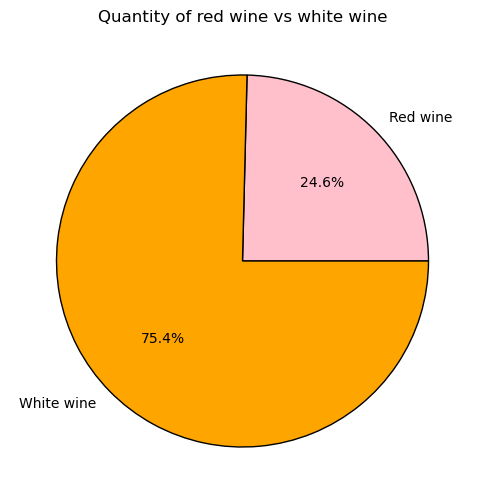

In [7]:
red_wine_count = red_wine.shape[0]
white_wine_count = white_wine.shape[0]

print(white_wine_count)

plt.figure(figsize=(6,6))

sizes = [red_wine_count, white_wine_count]
label = ['Red wine', 'White wine']
colour = ["pink" , "orange"]
plt.title("Quantity of red wine vs white wine")
plt.axis('equal')

plt.pie(sizes, labels= label, colors= colour, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.show()

Text(0.55, 1.03, 'Histplot for white wine')

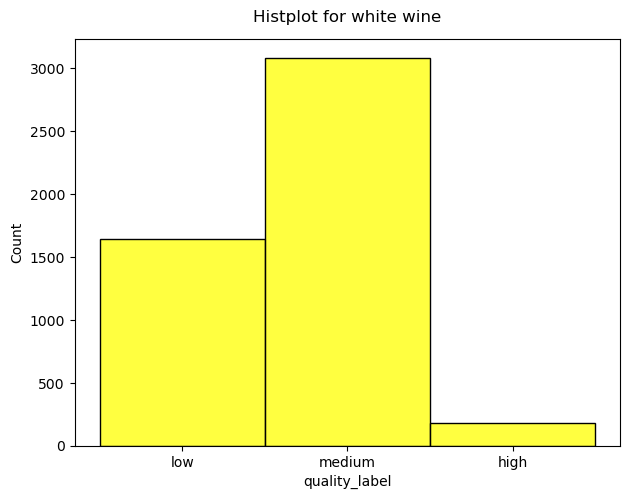

In [8]:
sns.histplot(data=white_wine, x = 'quality_label', color='yellow', edgecolor='black', bins=15)

plt.tight_layout()

plt.suptitle("Histplot for white wine", x = 0.55, y = 1.03)

Text(0.55, 1.03, 'Histplot for red wine')

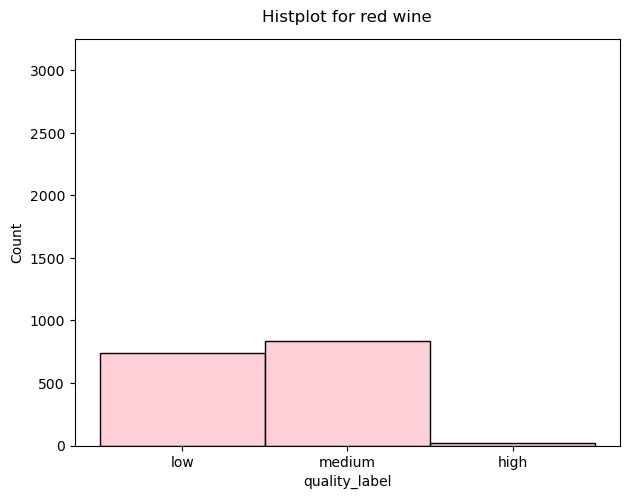

In [9]:
sns.histplot(data=red_wine, x = 'quality_label', color='pink', edgecolor='black', bins=15 )

plt.ylim(0, 3250)

plt.tight_layout()

plt.suptitle("Histplot for red wine", x = 0.55, y = 1.03)

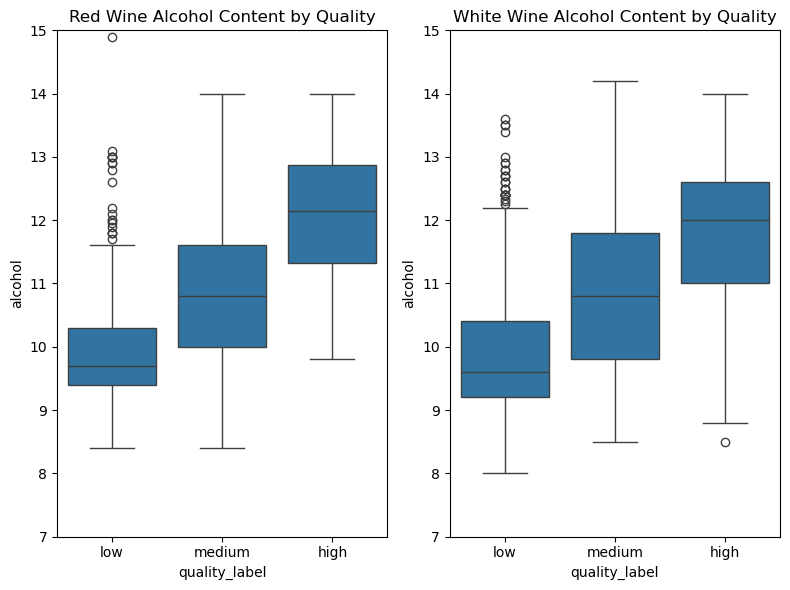

In [10]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data=red_wine, y= 'alcohol', x='quality_label')
plt.title('Red Wine Alcohol Content by Quality')
plt.ylim(7,15)
plt.subplot(1,2,2)
sns.boxplot(data=white_wine, y= 'alcohol', x='quality_label')
plt.title('White Wine Alcohol Content by Quality')
plt.ylim(7,15)
plt.tight_layout()

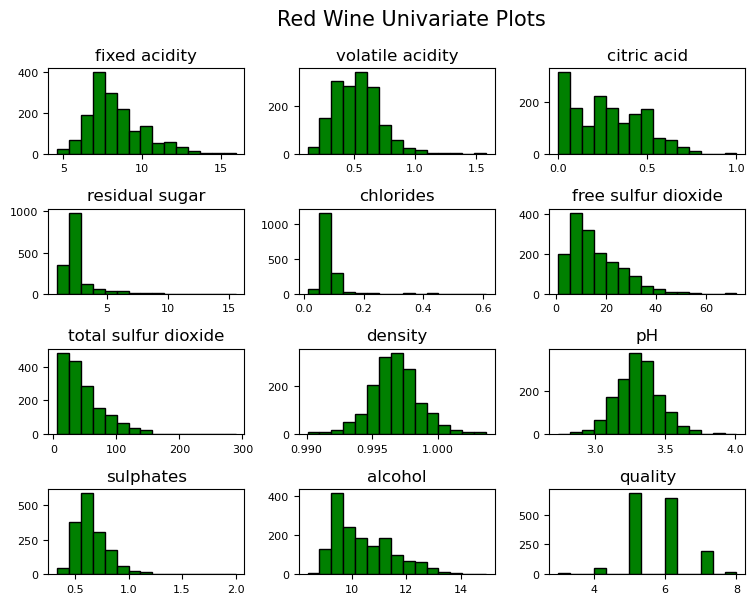

In [11]:
red_wine.hist(bins=15, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

t = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)



Text(0.77, 1.85, 'Good class red comparisions')

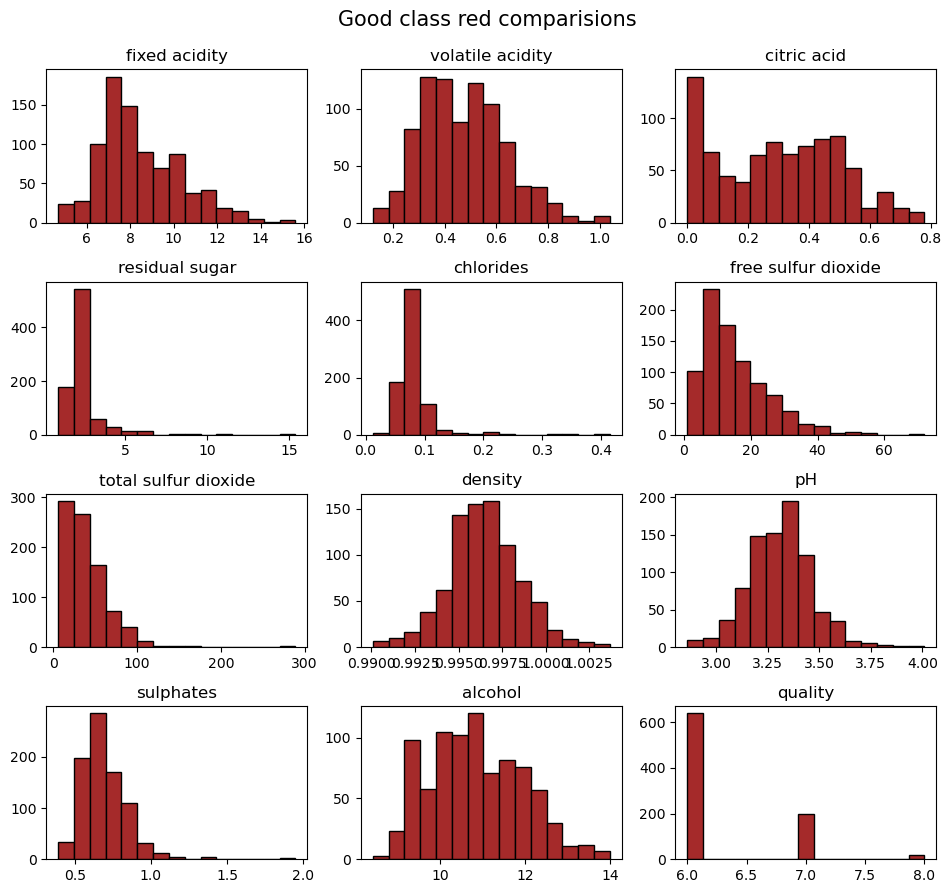

In [12]:
good_class_red = red_wine[(red_wine['quality'] >= 6)]

good_class_red.hist(color = 'brown', bins=15, grid = False, edgecolor = "black")

plt.tight_layout(rect=(0, 0, 1.5, 1.8))

plt.suptitle("Good class red comparisions", x=0.77, y=1.85, fontsize=15)

Text(0.77, 1.85, 'Bad class red comparisions')

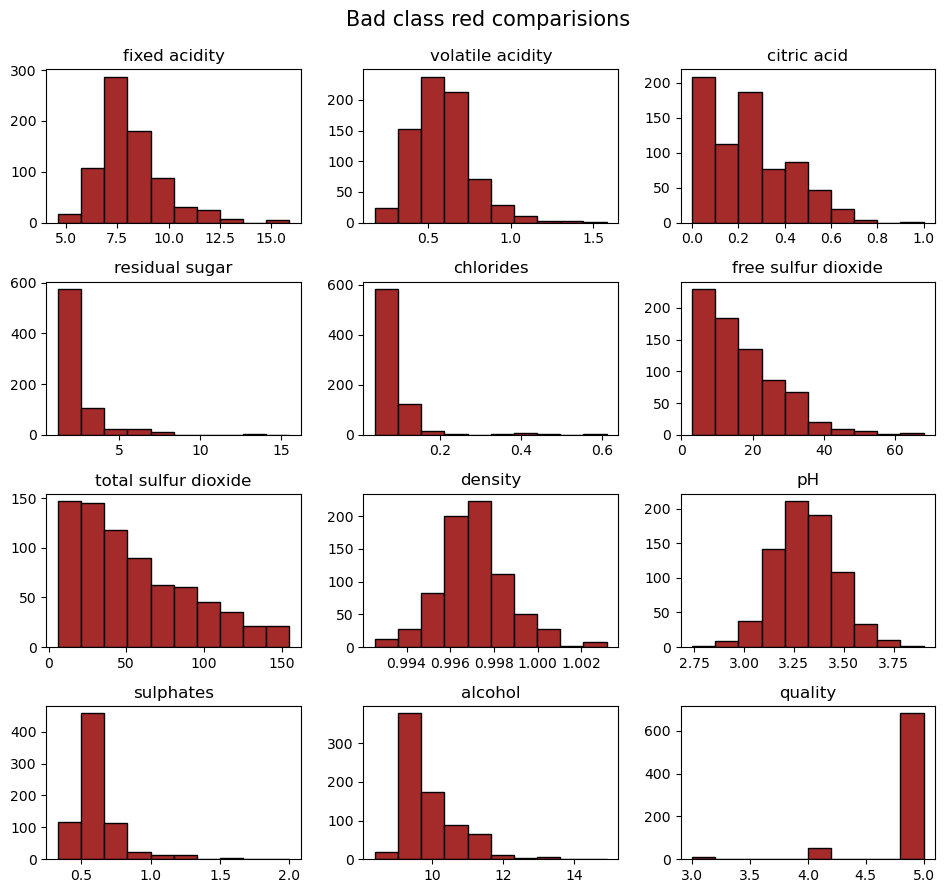

In [13]:
bad_class_red = red_wine[(red_wine['quality'] <= 5)]

bad_class_red.hist(color = 'brown', edgecolor='black', grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.8))

plt.suptitle("Bad class red comparisions", x=0.77, y=1.85, fontsize=15)

Text(0.55, 1.05, 'Residual suger amount for red wine')

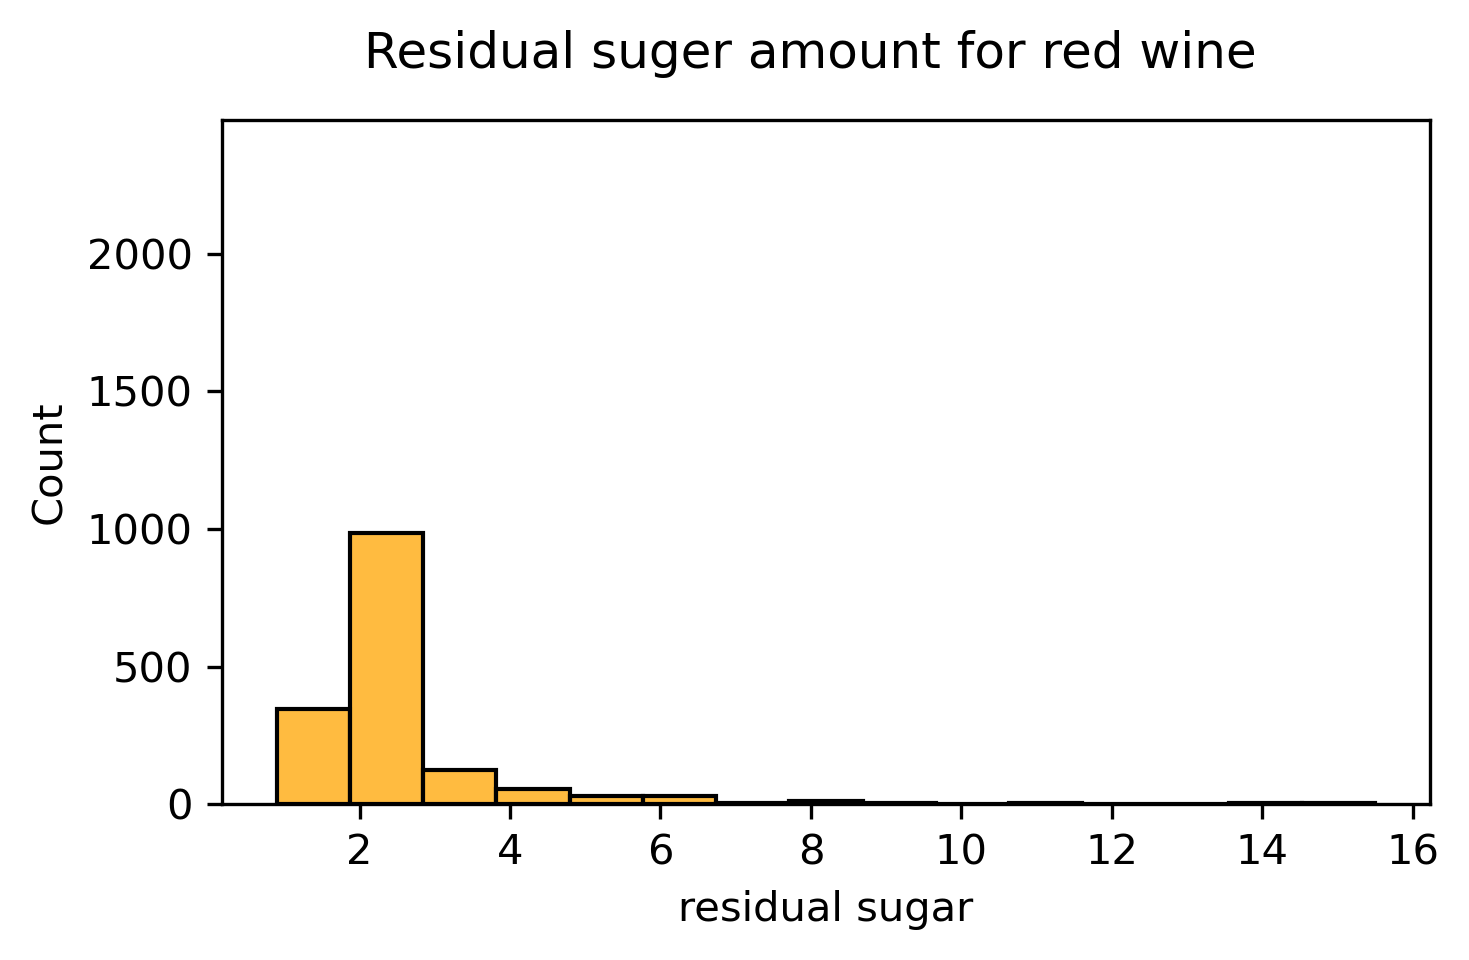

In [14]:
plt.figure(figsize=(5,3), dpi=300)

sns.histplot(data=red_wine, color='orange', edgecolor = 'black', x='residual sugar', bins=15)

plt.ylim(0, 2485.35)

plt.tight_layout()

plt.suptitle("Residual suger amount for red wine", x=0.55, y=1.05)



Text(0.55, 1.05, 'Residual suger amount for red wine')

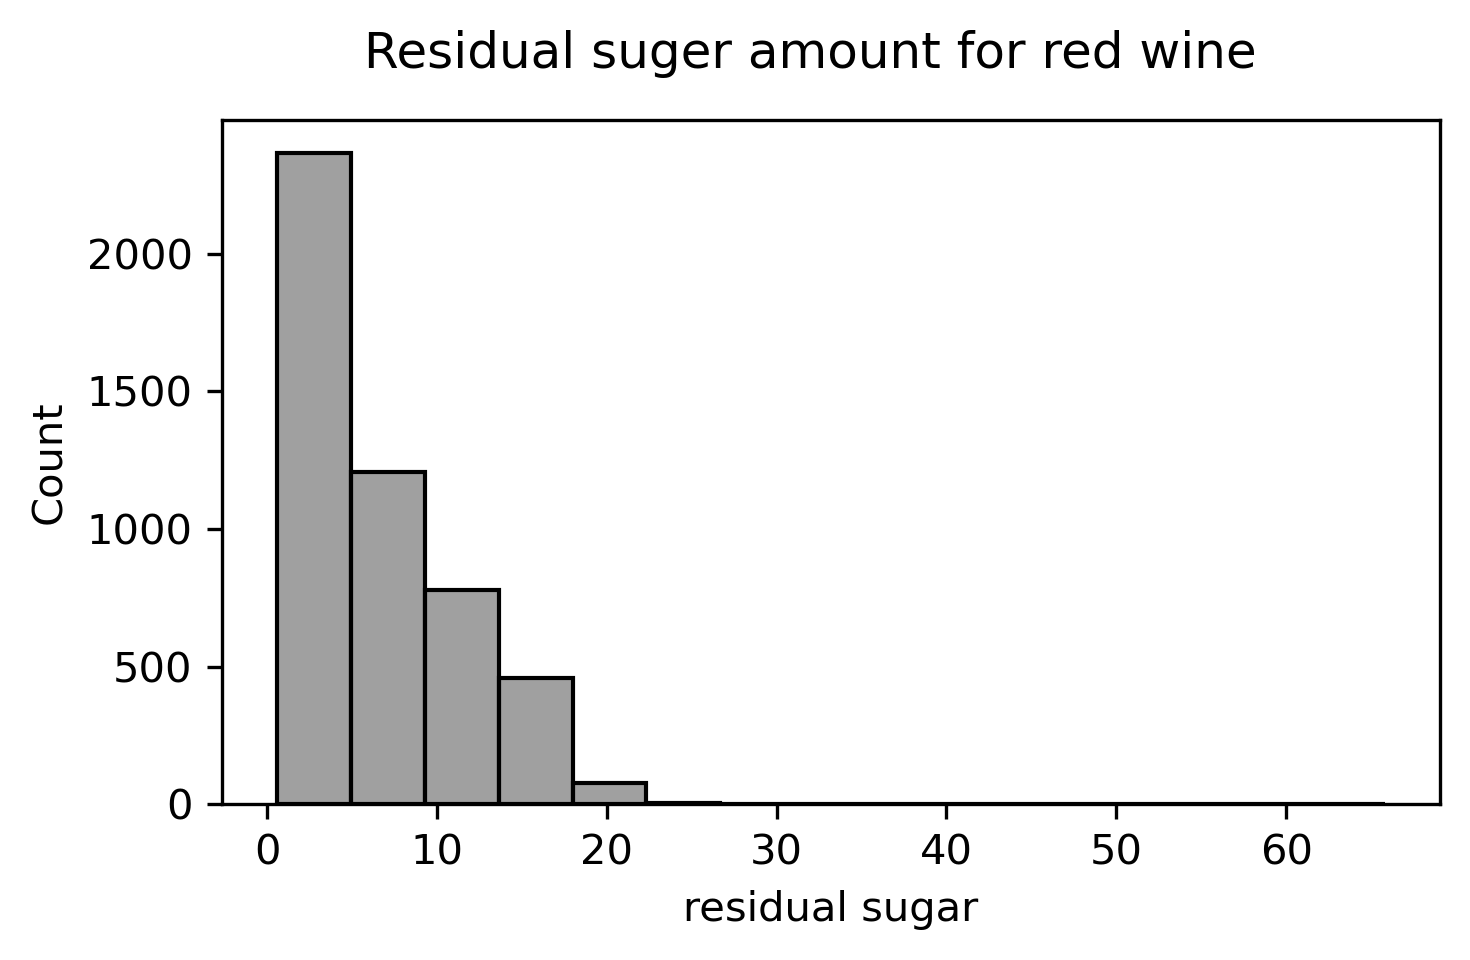

In [15]:
plt.figure(figsize=(5,3), dpi=300)

sns.histplot(data=white_wine, color='grey', edgecolor = 'black', x='residual sugar', bins=15)

plt.tight_layout()

plt.suptitle("Residual suger amount for red wine", x=0.55, y=1.05)

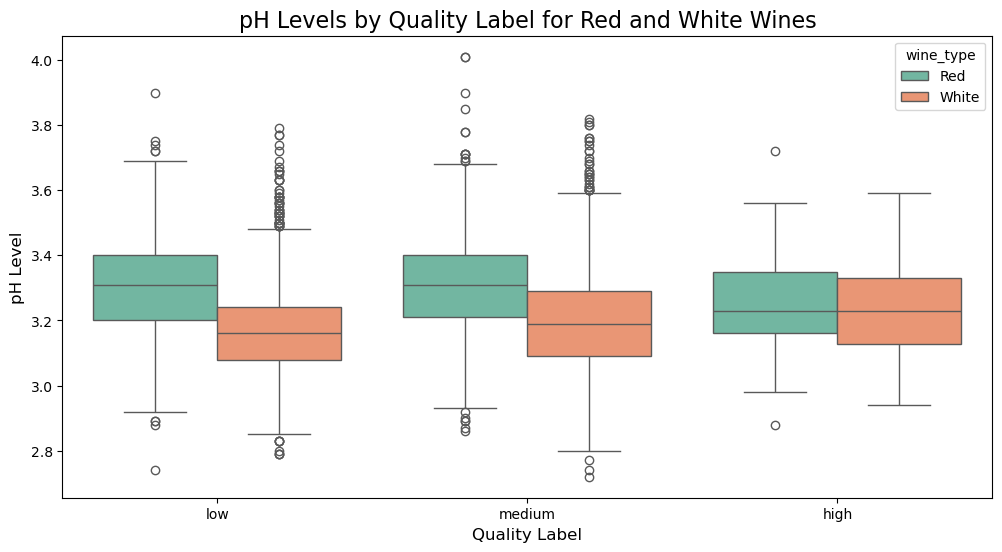

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=both_wines, x='quality_label', y='pH', hue='wine_type', palette='Set2')


plt.title("pH Levels by Quality Label for Red and White Wines", fontsize=16)
plt.xlabel("Quality Label", fontsize=12)
plt.ylabel("pH Level", fontsize=12)


plt.show()

Text(0.77, 1.85, 'good quality white wine')

<Figure size 1800x1800 with 0 Axes>

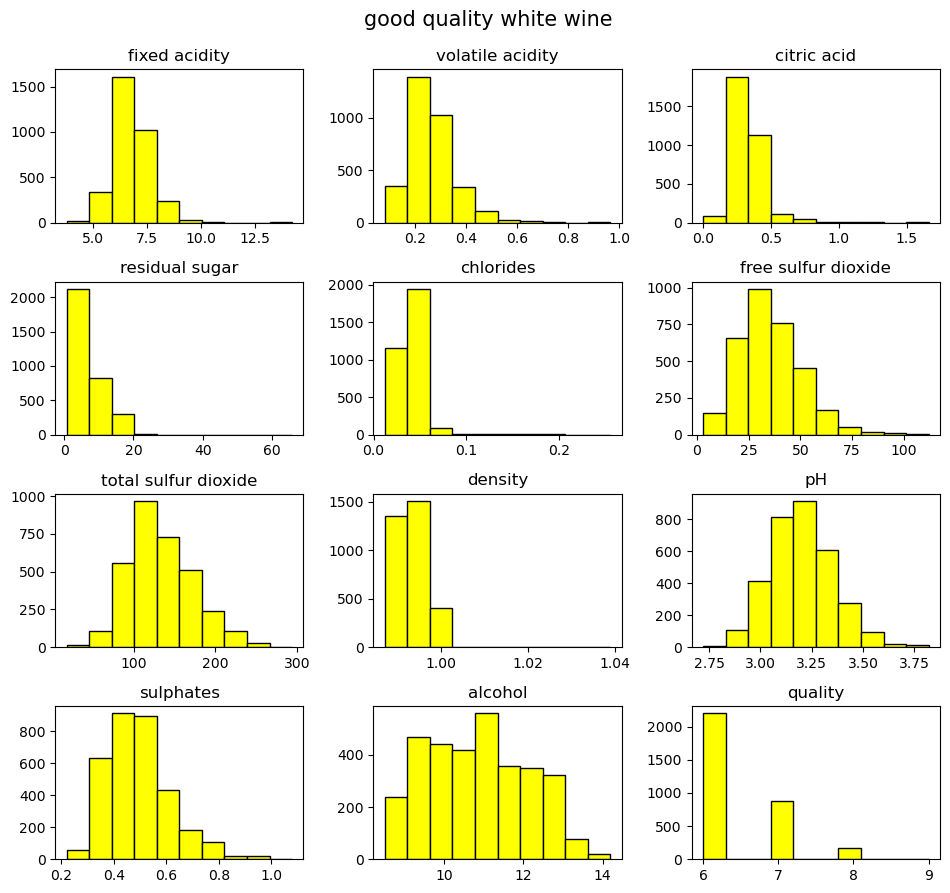

In [17]:
plt.figure(figsize=(6,6), dpi=300)

good_quality_white = white_wine[(white_wine['quality'] >= 6 )]
bad_quality_white = white_wine[(white_wine['quality'] <= 5)]

good_quality_white.hist(edgecolor='black', color='yellow', grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.8))

plt.suptitle("good quality white wine", x=0.77, y=1.85, fontsize=15)

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

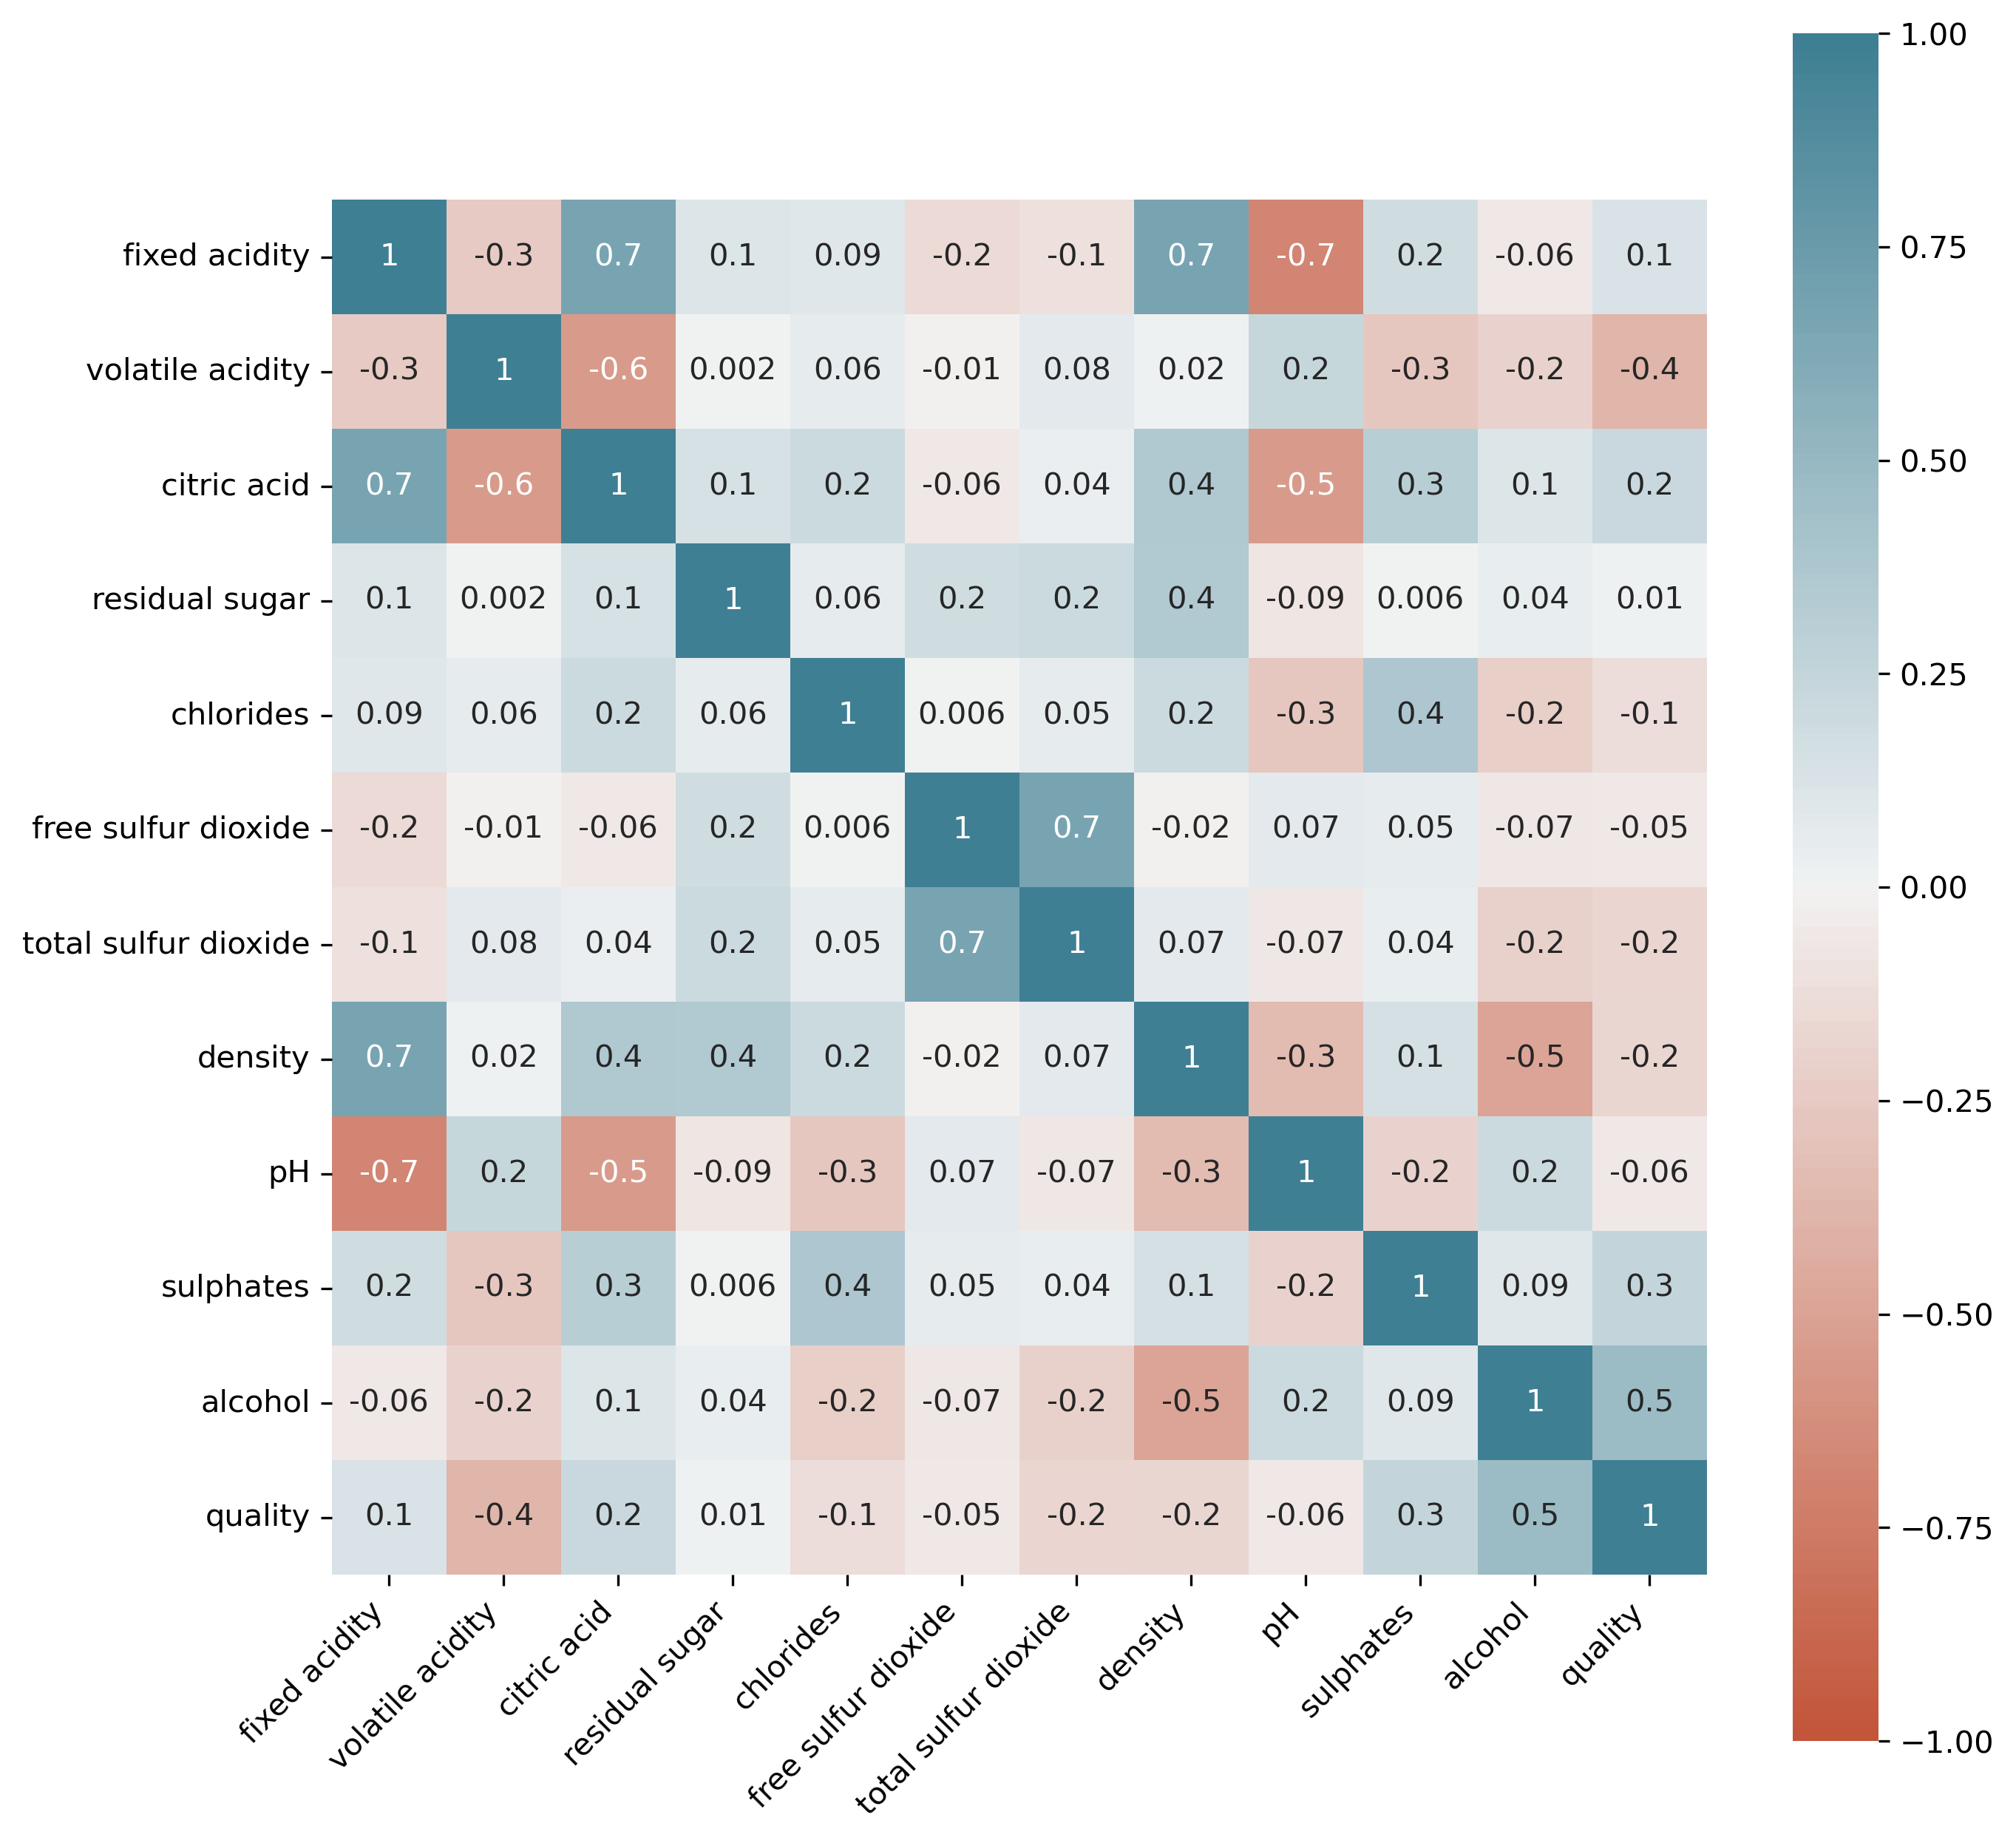

In [18]:
white_wine_NoLabel = red_wine.drop(['quality_label', 'wine_type'], axis=1)

corr = white_wine_NoLabel.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

(0.988, 1.005)

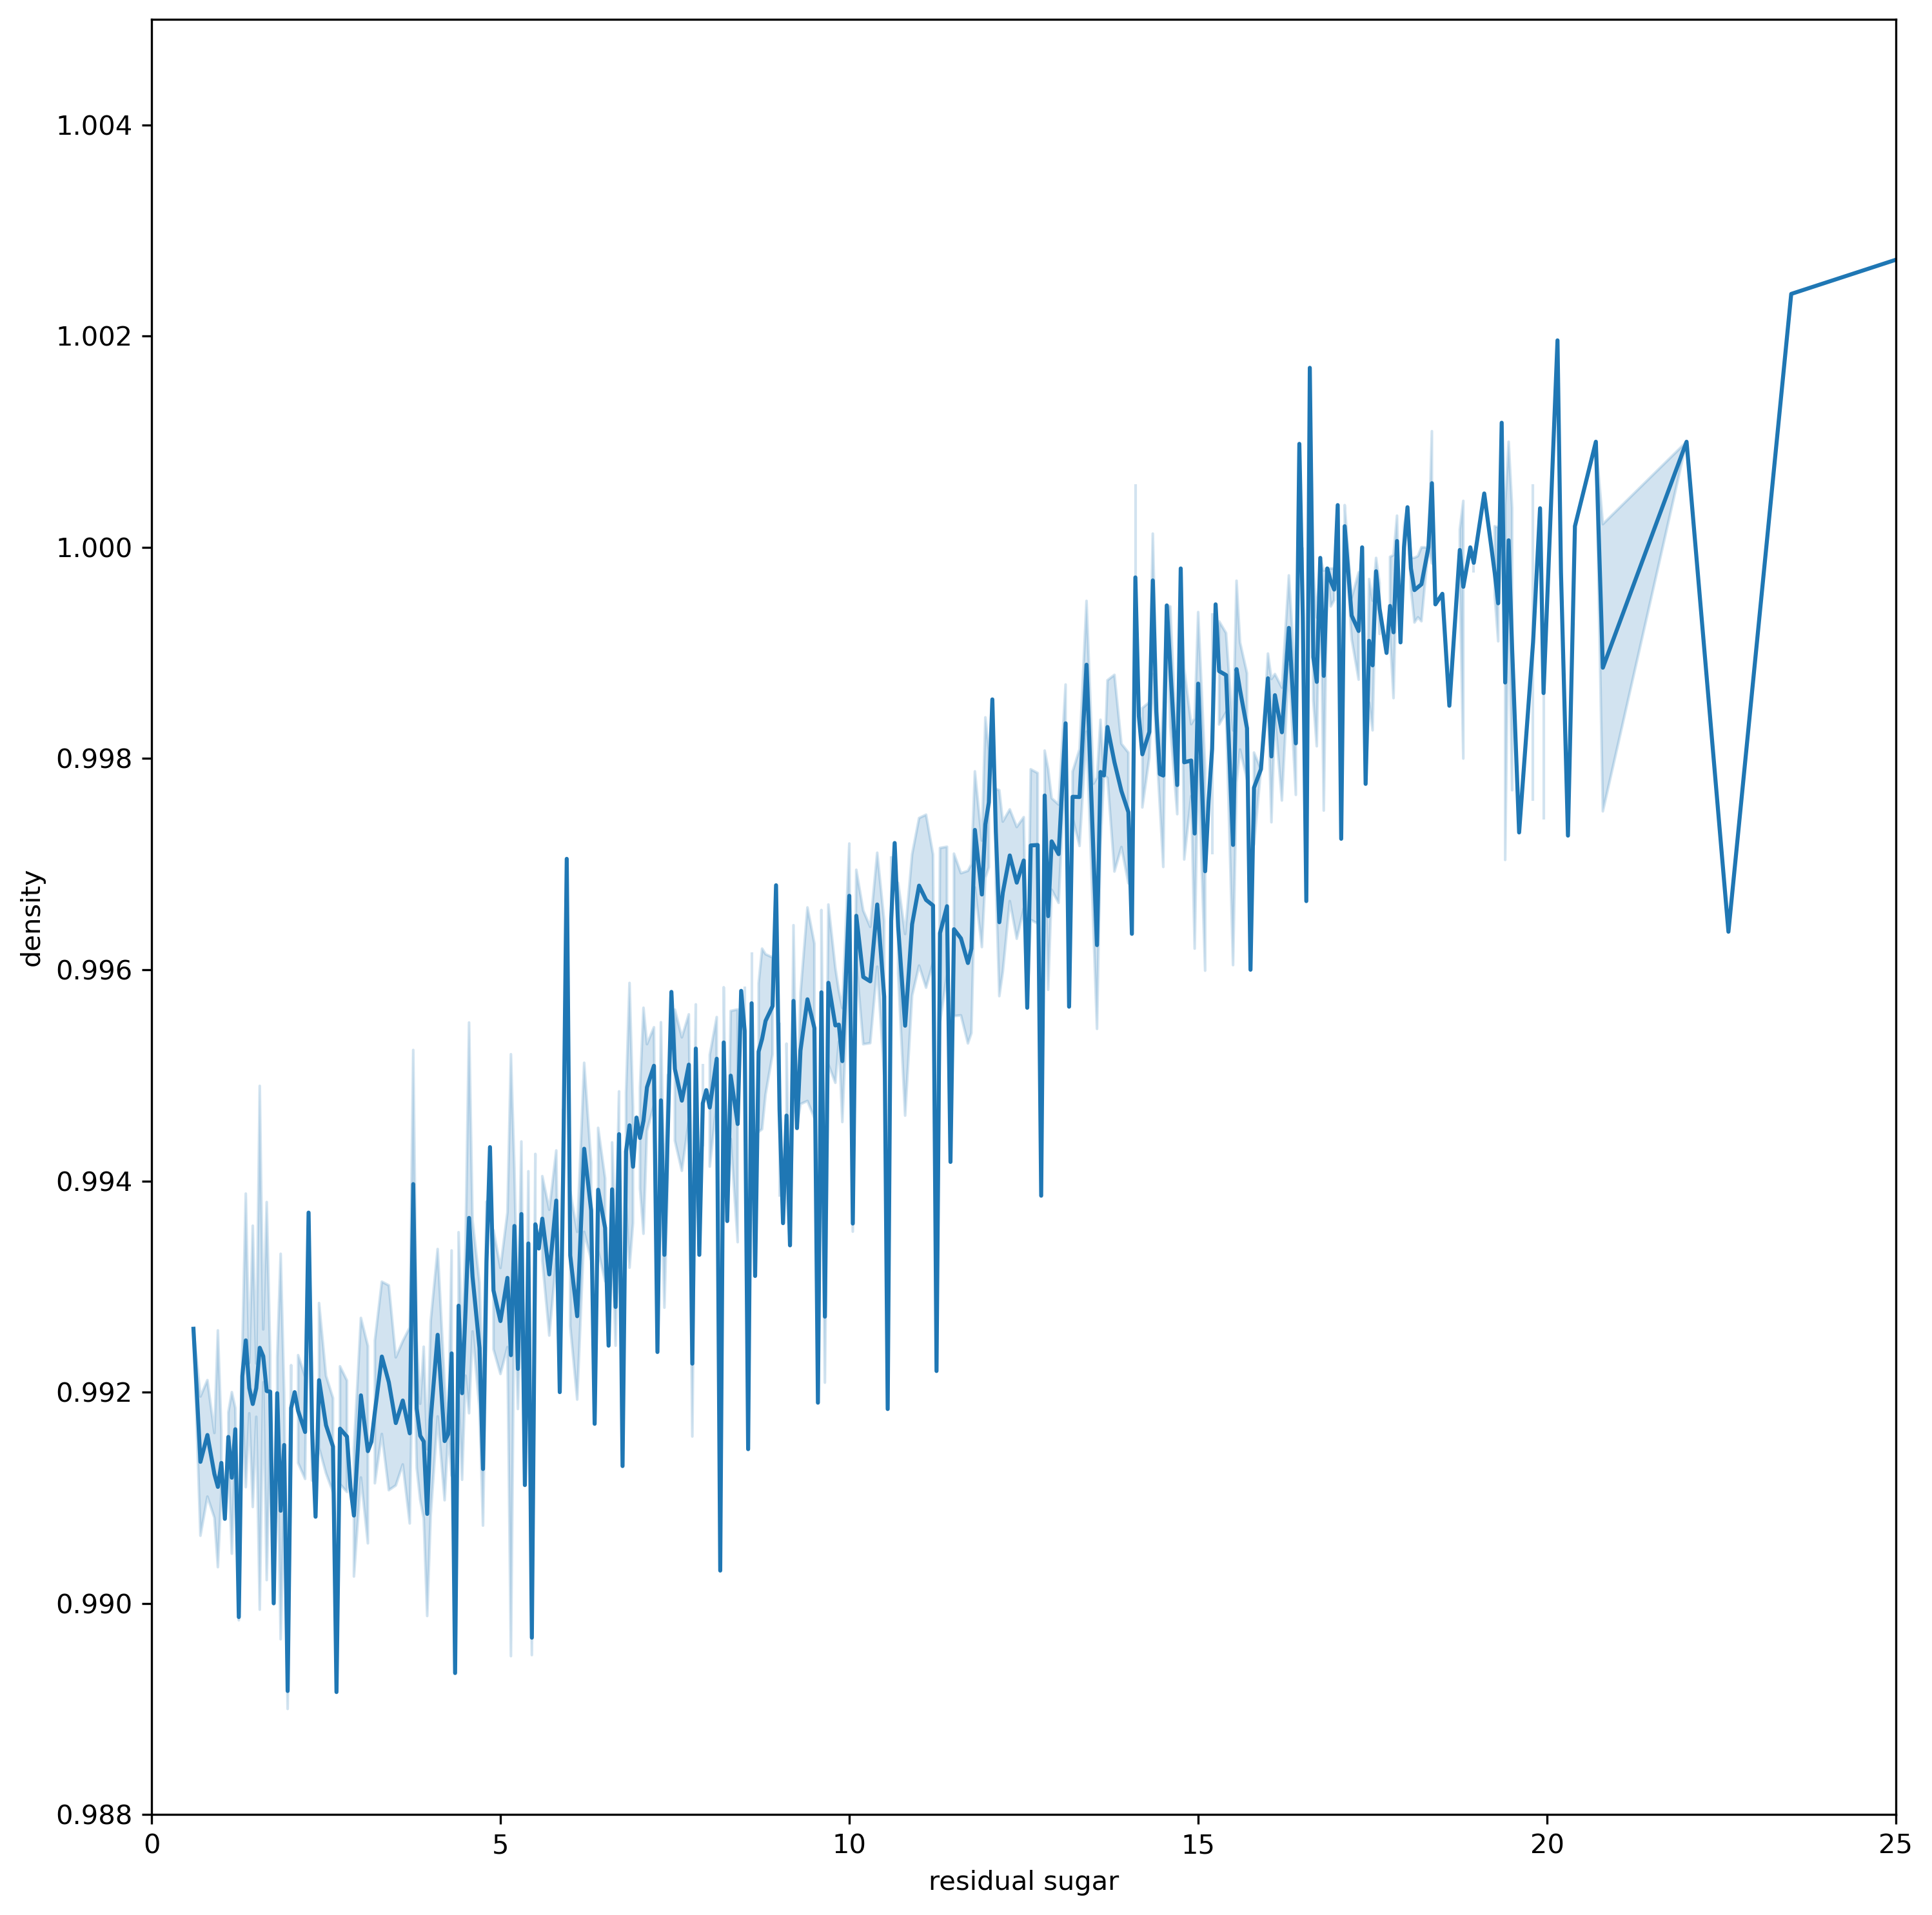

In [19]:
plt.figure(figsize=(10,10), dpi=300)
ax = sns.lineplot(data=white_wine, x='residual sugar', y='density')
plt.xlim(0, 25)
plt.tight_layout()
ax.set_ylim(0.988, 1.005)

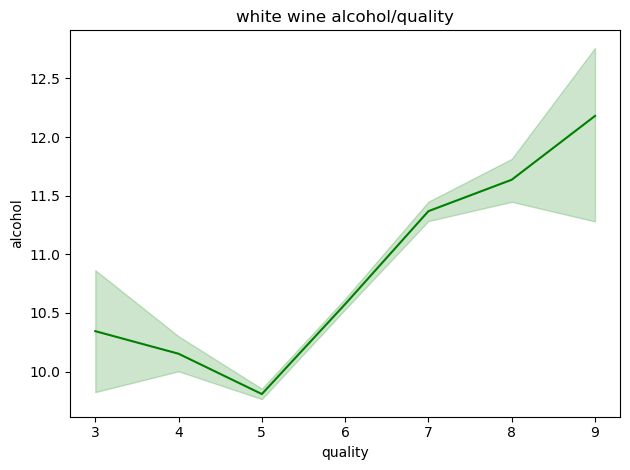

In [20]:
sns.lineplot(data=white_wine, color='green', x='quality', y= 'alcohol')
plt.title("white wine alcohol/quality")
plt.tight_layout()

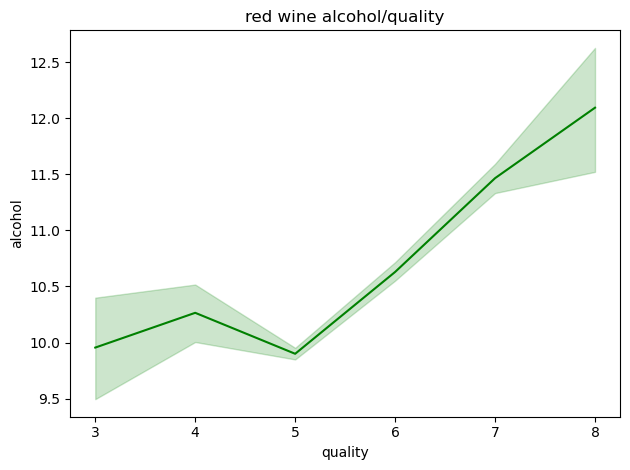

In [21]:
sns.lineplot(data=red_wine, color='green', x='quality', y= 'alcohol')
plt.title("red wine alcohol/quality")
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/504958674.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.boxplot(data=both_wines, color='yellow', x='quality', y= 'alcohol', hue='wine_type')


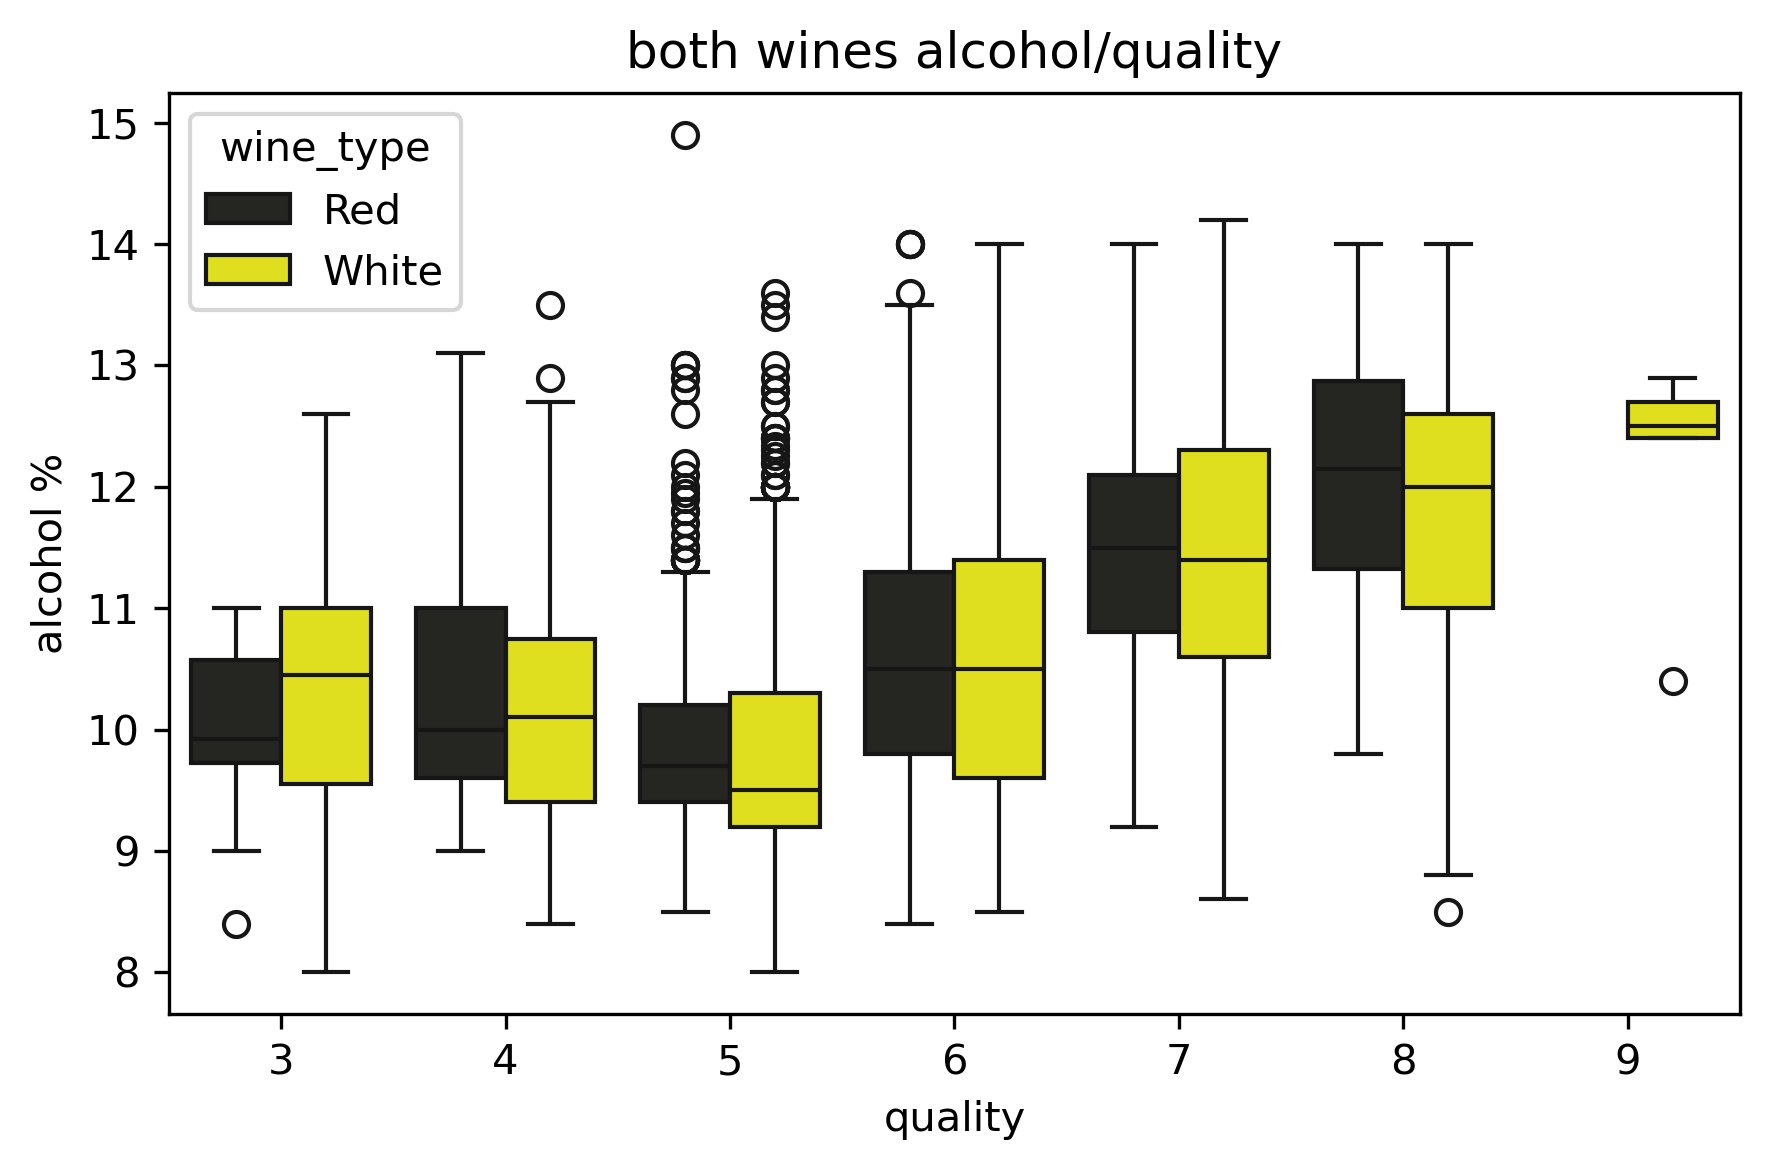

In [22]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=both_wines, color='yellow', x='quality', y= 'alcohol', hue='wine_type')
plt.title("both wines alcohol/quality")
plt.ylabel("alcohol %")
plt.tight_layout()

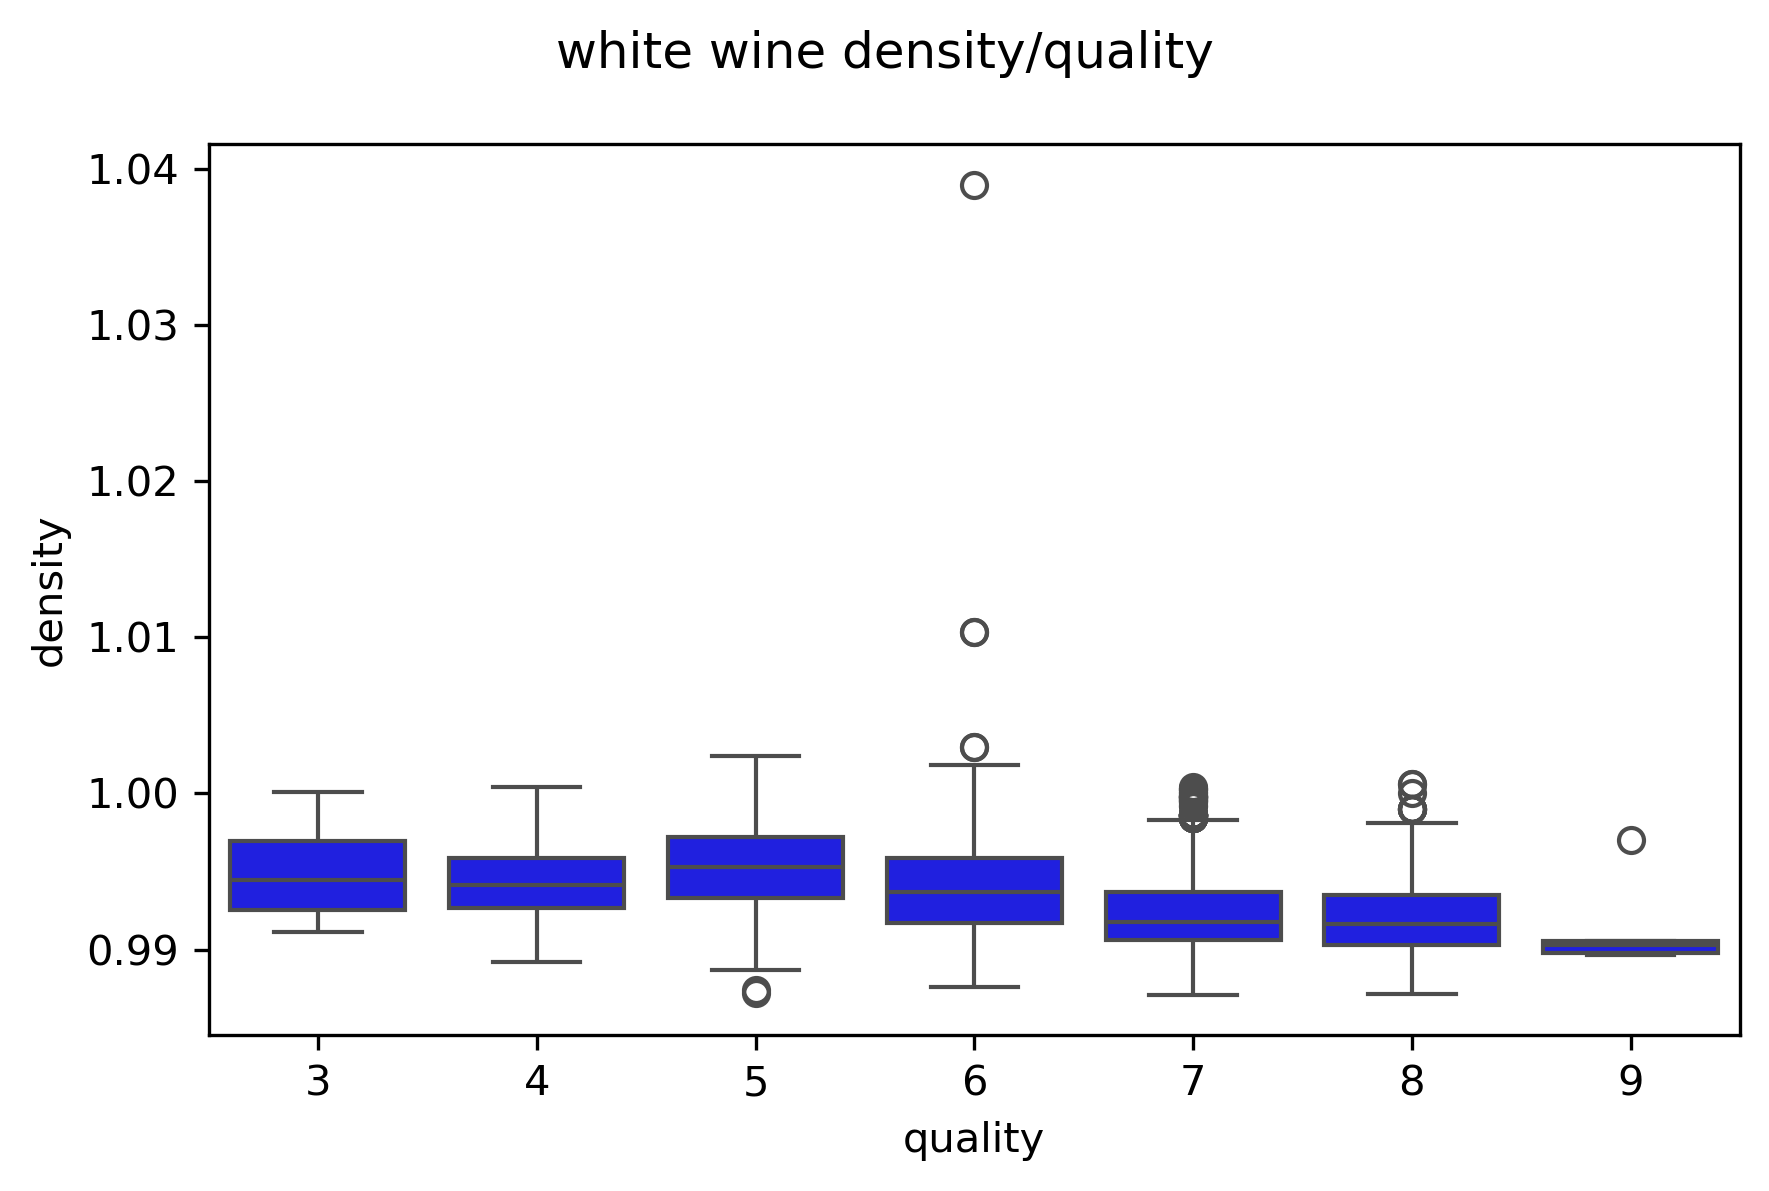

In [23]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=white_wine, color='blue', x='quality', y= 'density')
plt.suptitle("white wine density/quality")
plt.tight_layout()

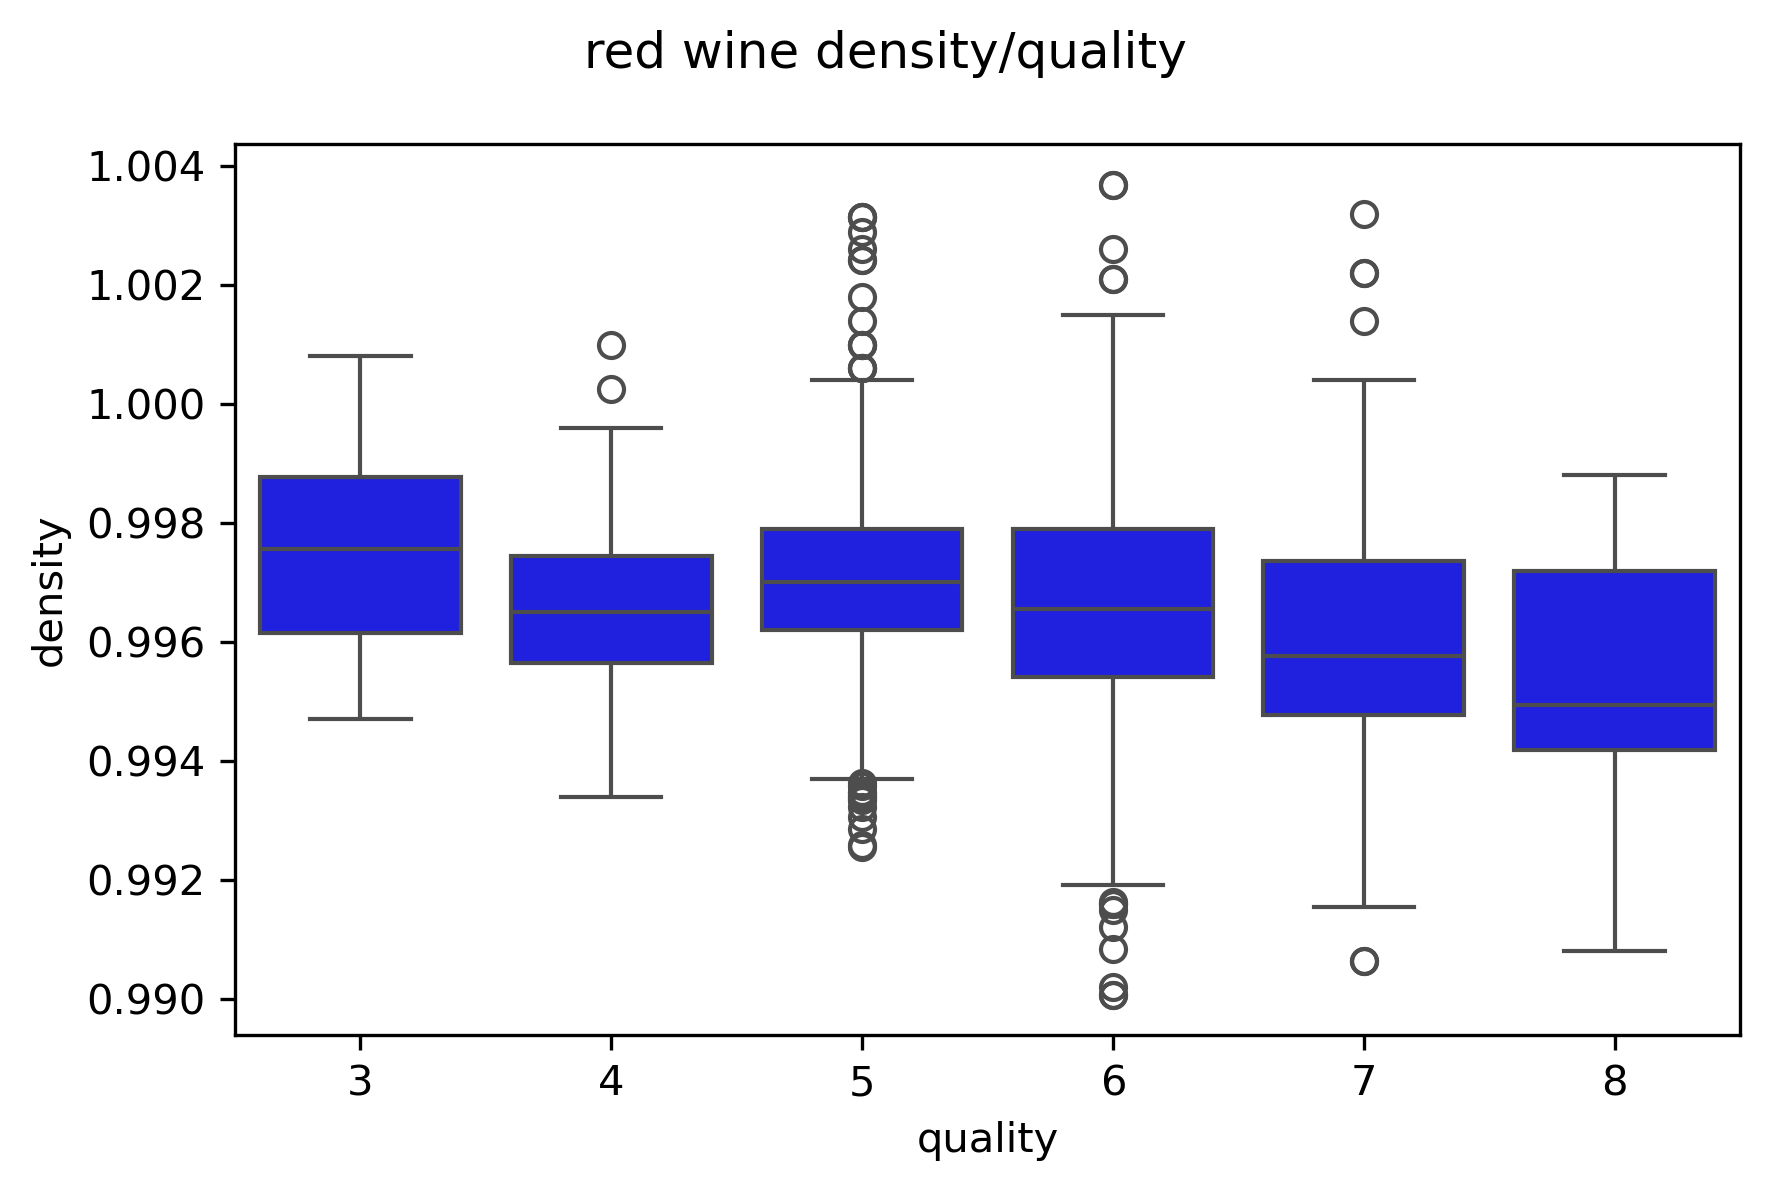

In [24]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=red_wine, color='blue', x='quality', y= 'density')
plt.suptitle("red wine density/quality")
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/1376321118.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.boxplot(data=both_wines, color='blue', x='quality', y= 'density', hue='wine_type')


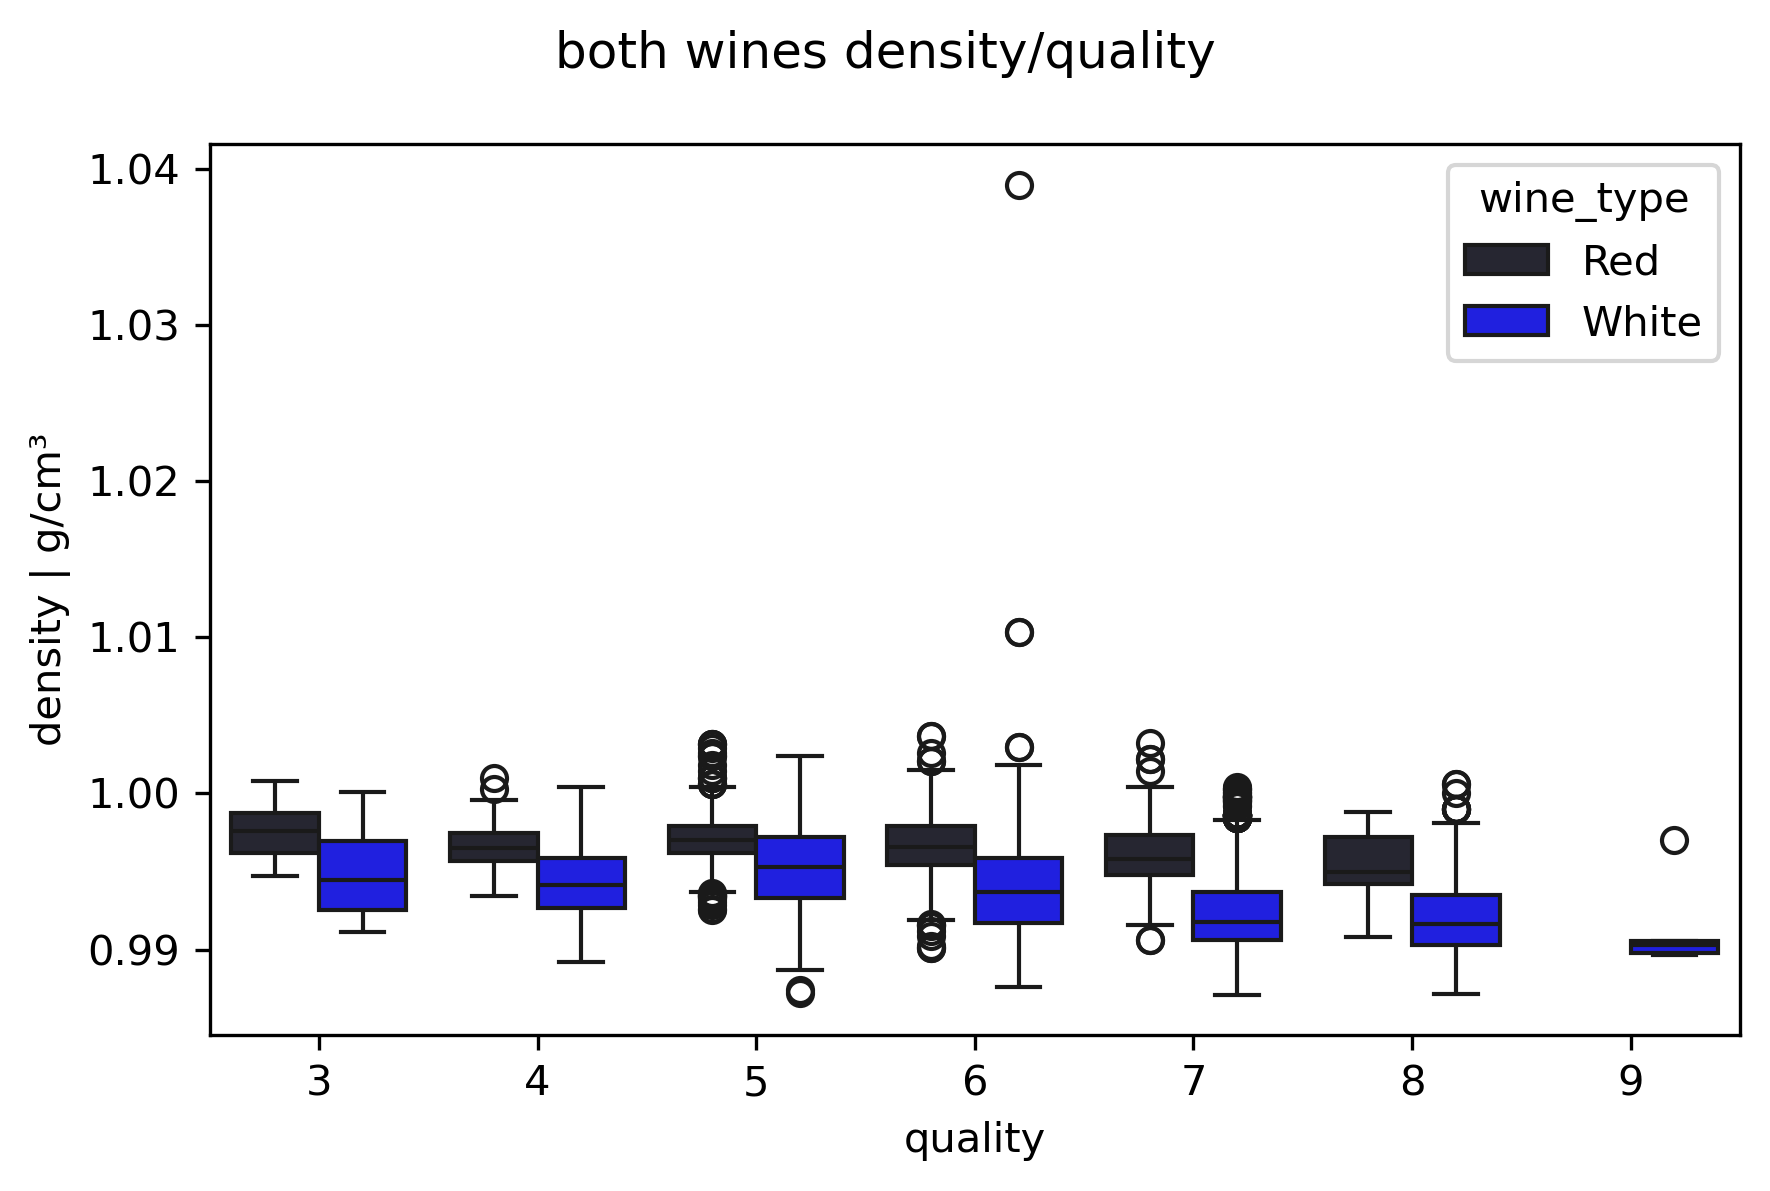

In [25]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=both_wines, color='blue', x='quality', y= 'density', hue='wine_type')
plt.suptitle("both wines density/quality")
plt.ylabel("density | g/cm³")
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/1695869972.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.boxplot(data=both_wines, color='red', x='quality', y= 'pH', hue='wine_type')


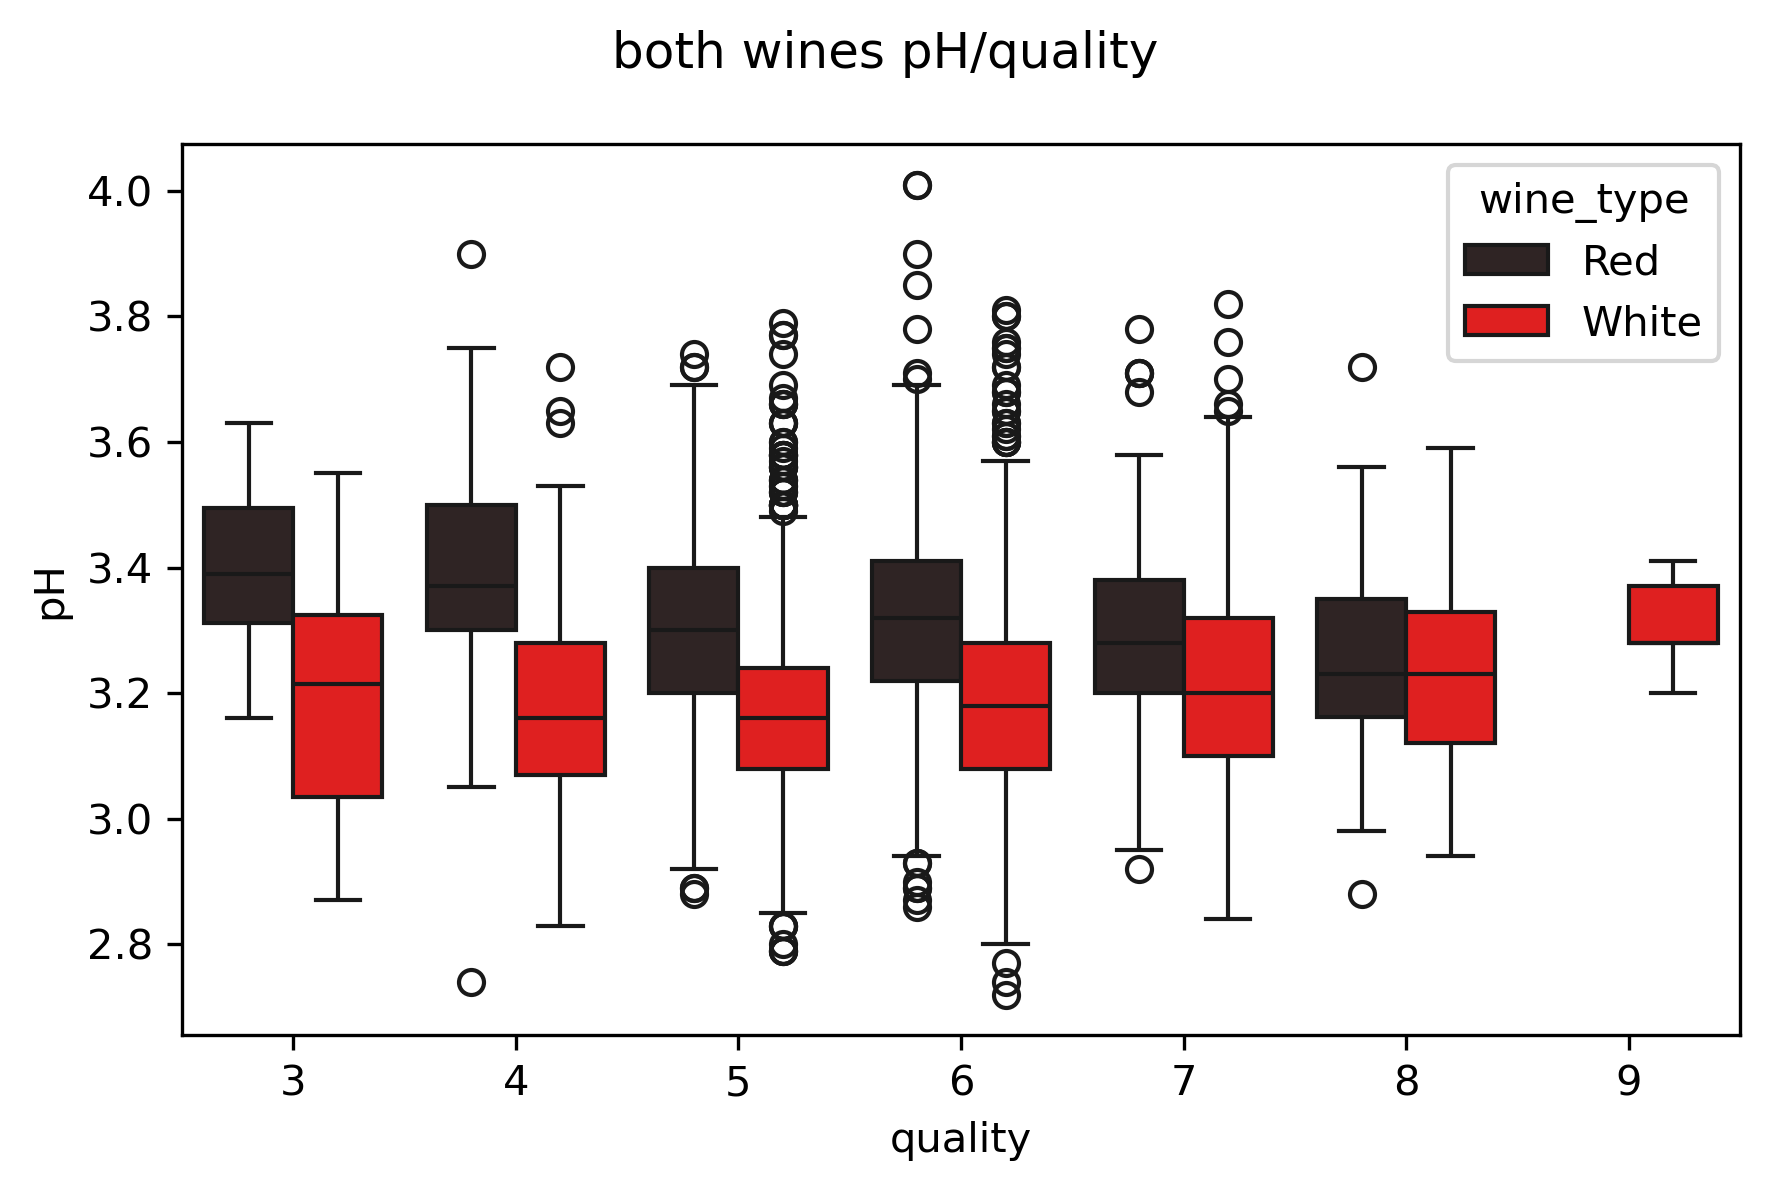

In [26]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=both_wines, color='red', x='quality', y= 'pH', hue='wine_type')

plt.suptitle("both wines pH/quality")

plt.tight_layout()

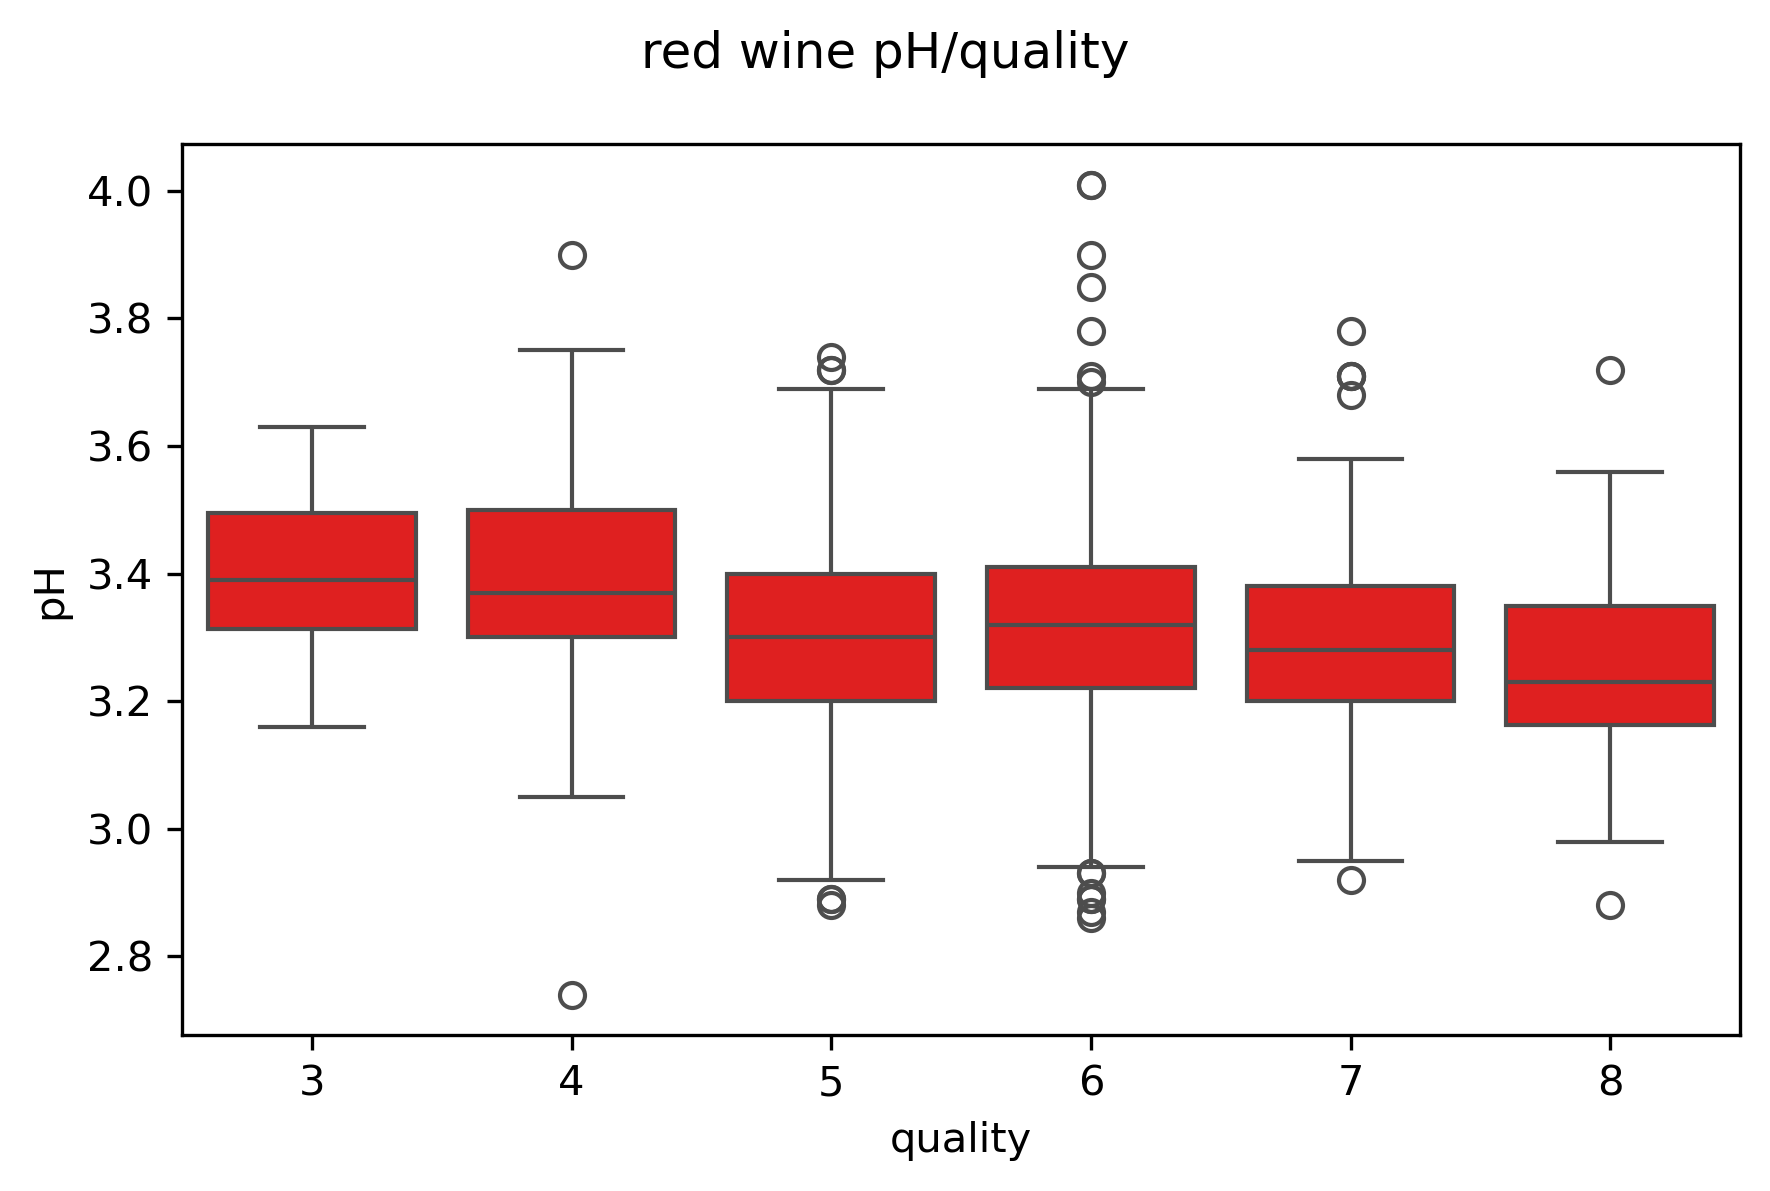

In [27]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=red_wine, color='red', x='quality', y= 'pH')
plt.suptitle("red wine pH/quality")
plt.tight_layout()

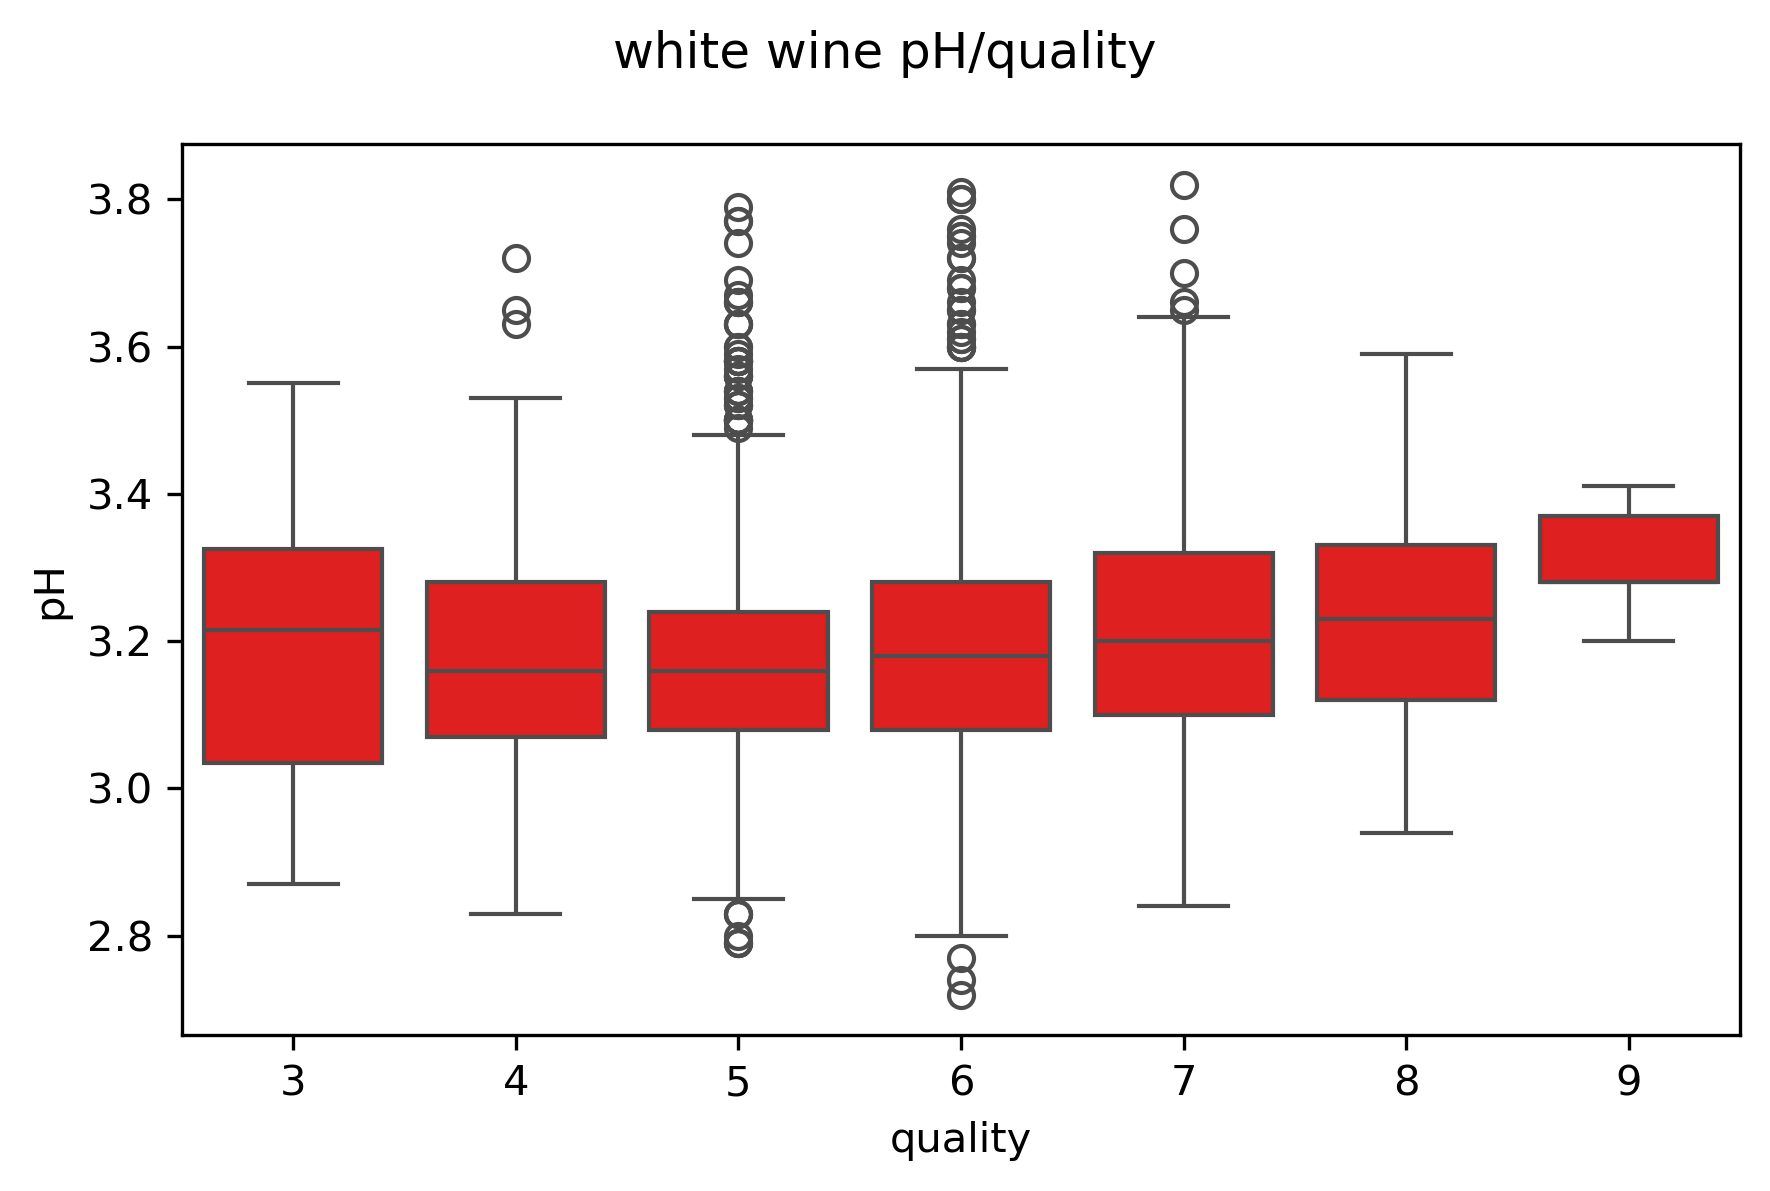

In [28]:
plt.figure(figsize=(6,4),dpi=300)
sns.boxplot(data=white_wine, color='red', x='quality', y= 'pH')
plt.suptitle("white wine pH/quality")
plt.tight_layout()

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

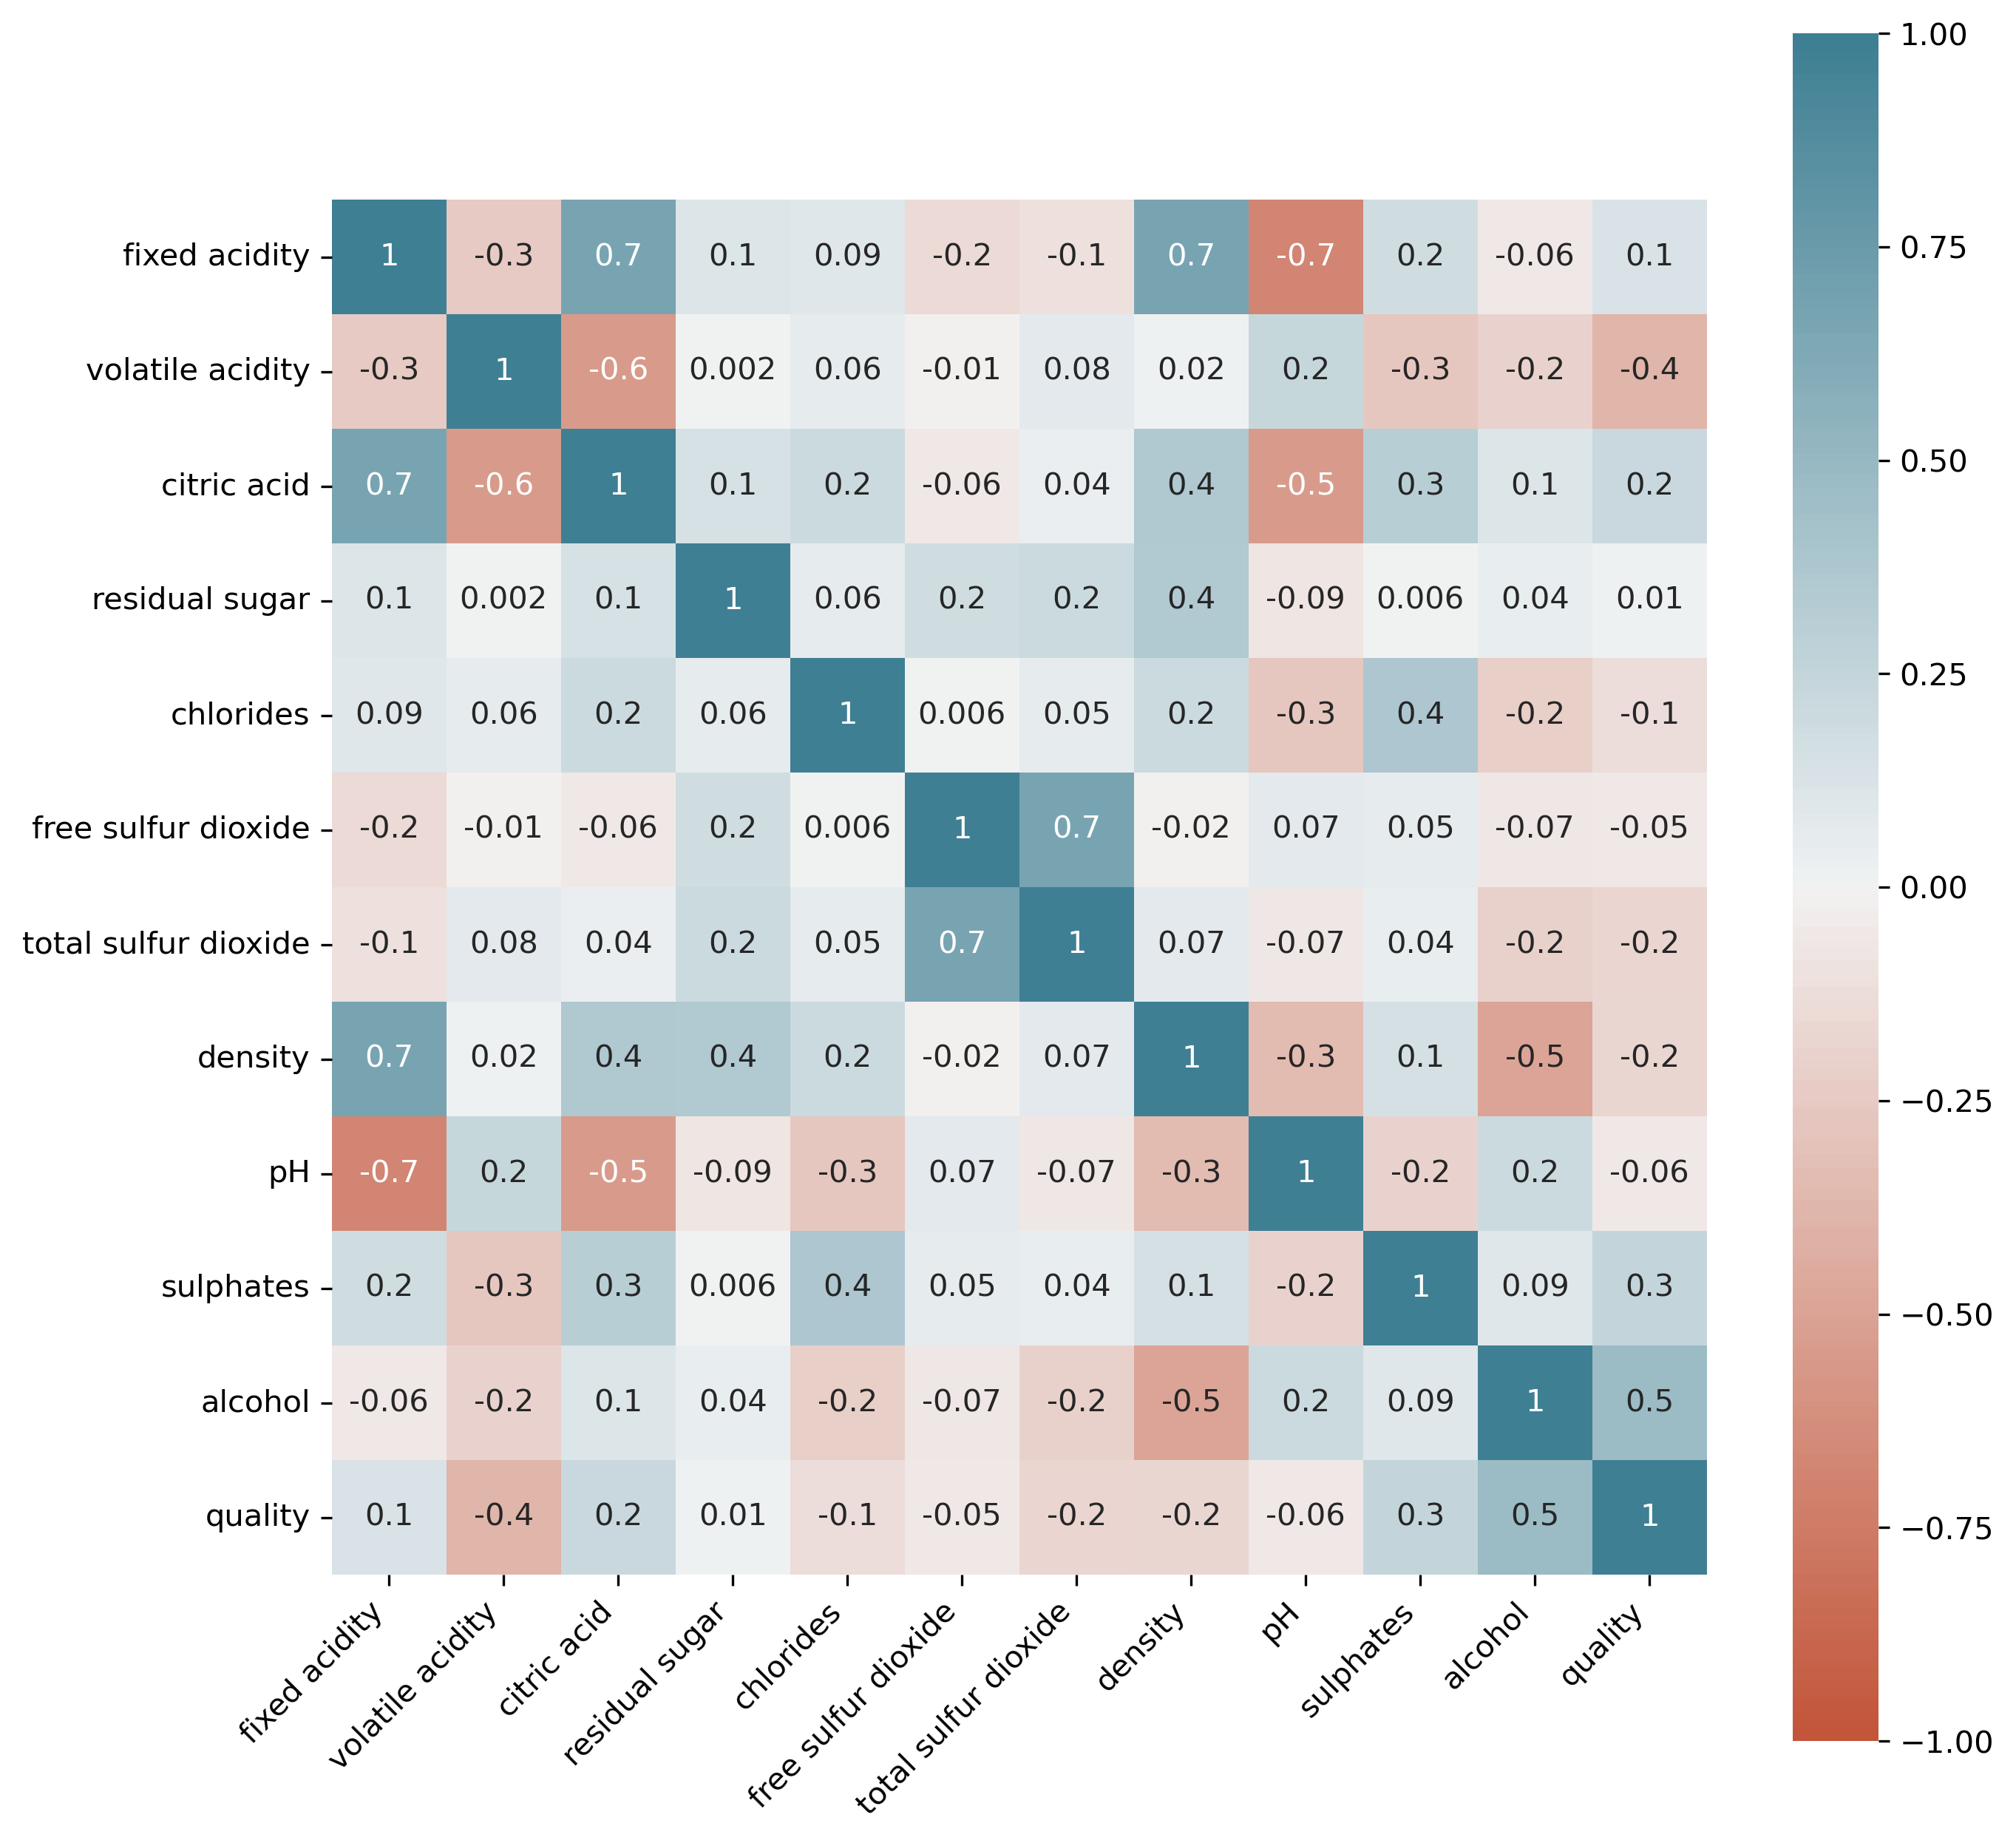

In [29]:
white_wine_nostr = red_wine.drop(['quality_label', 'wine_type'], axis=1)

corr = white_wine_nostr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

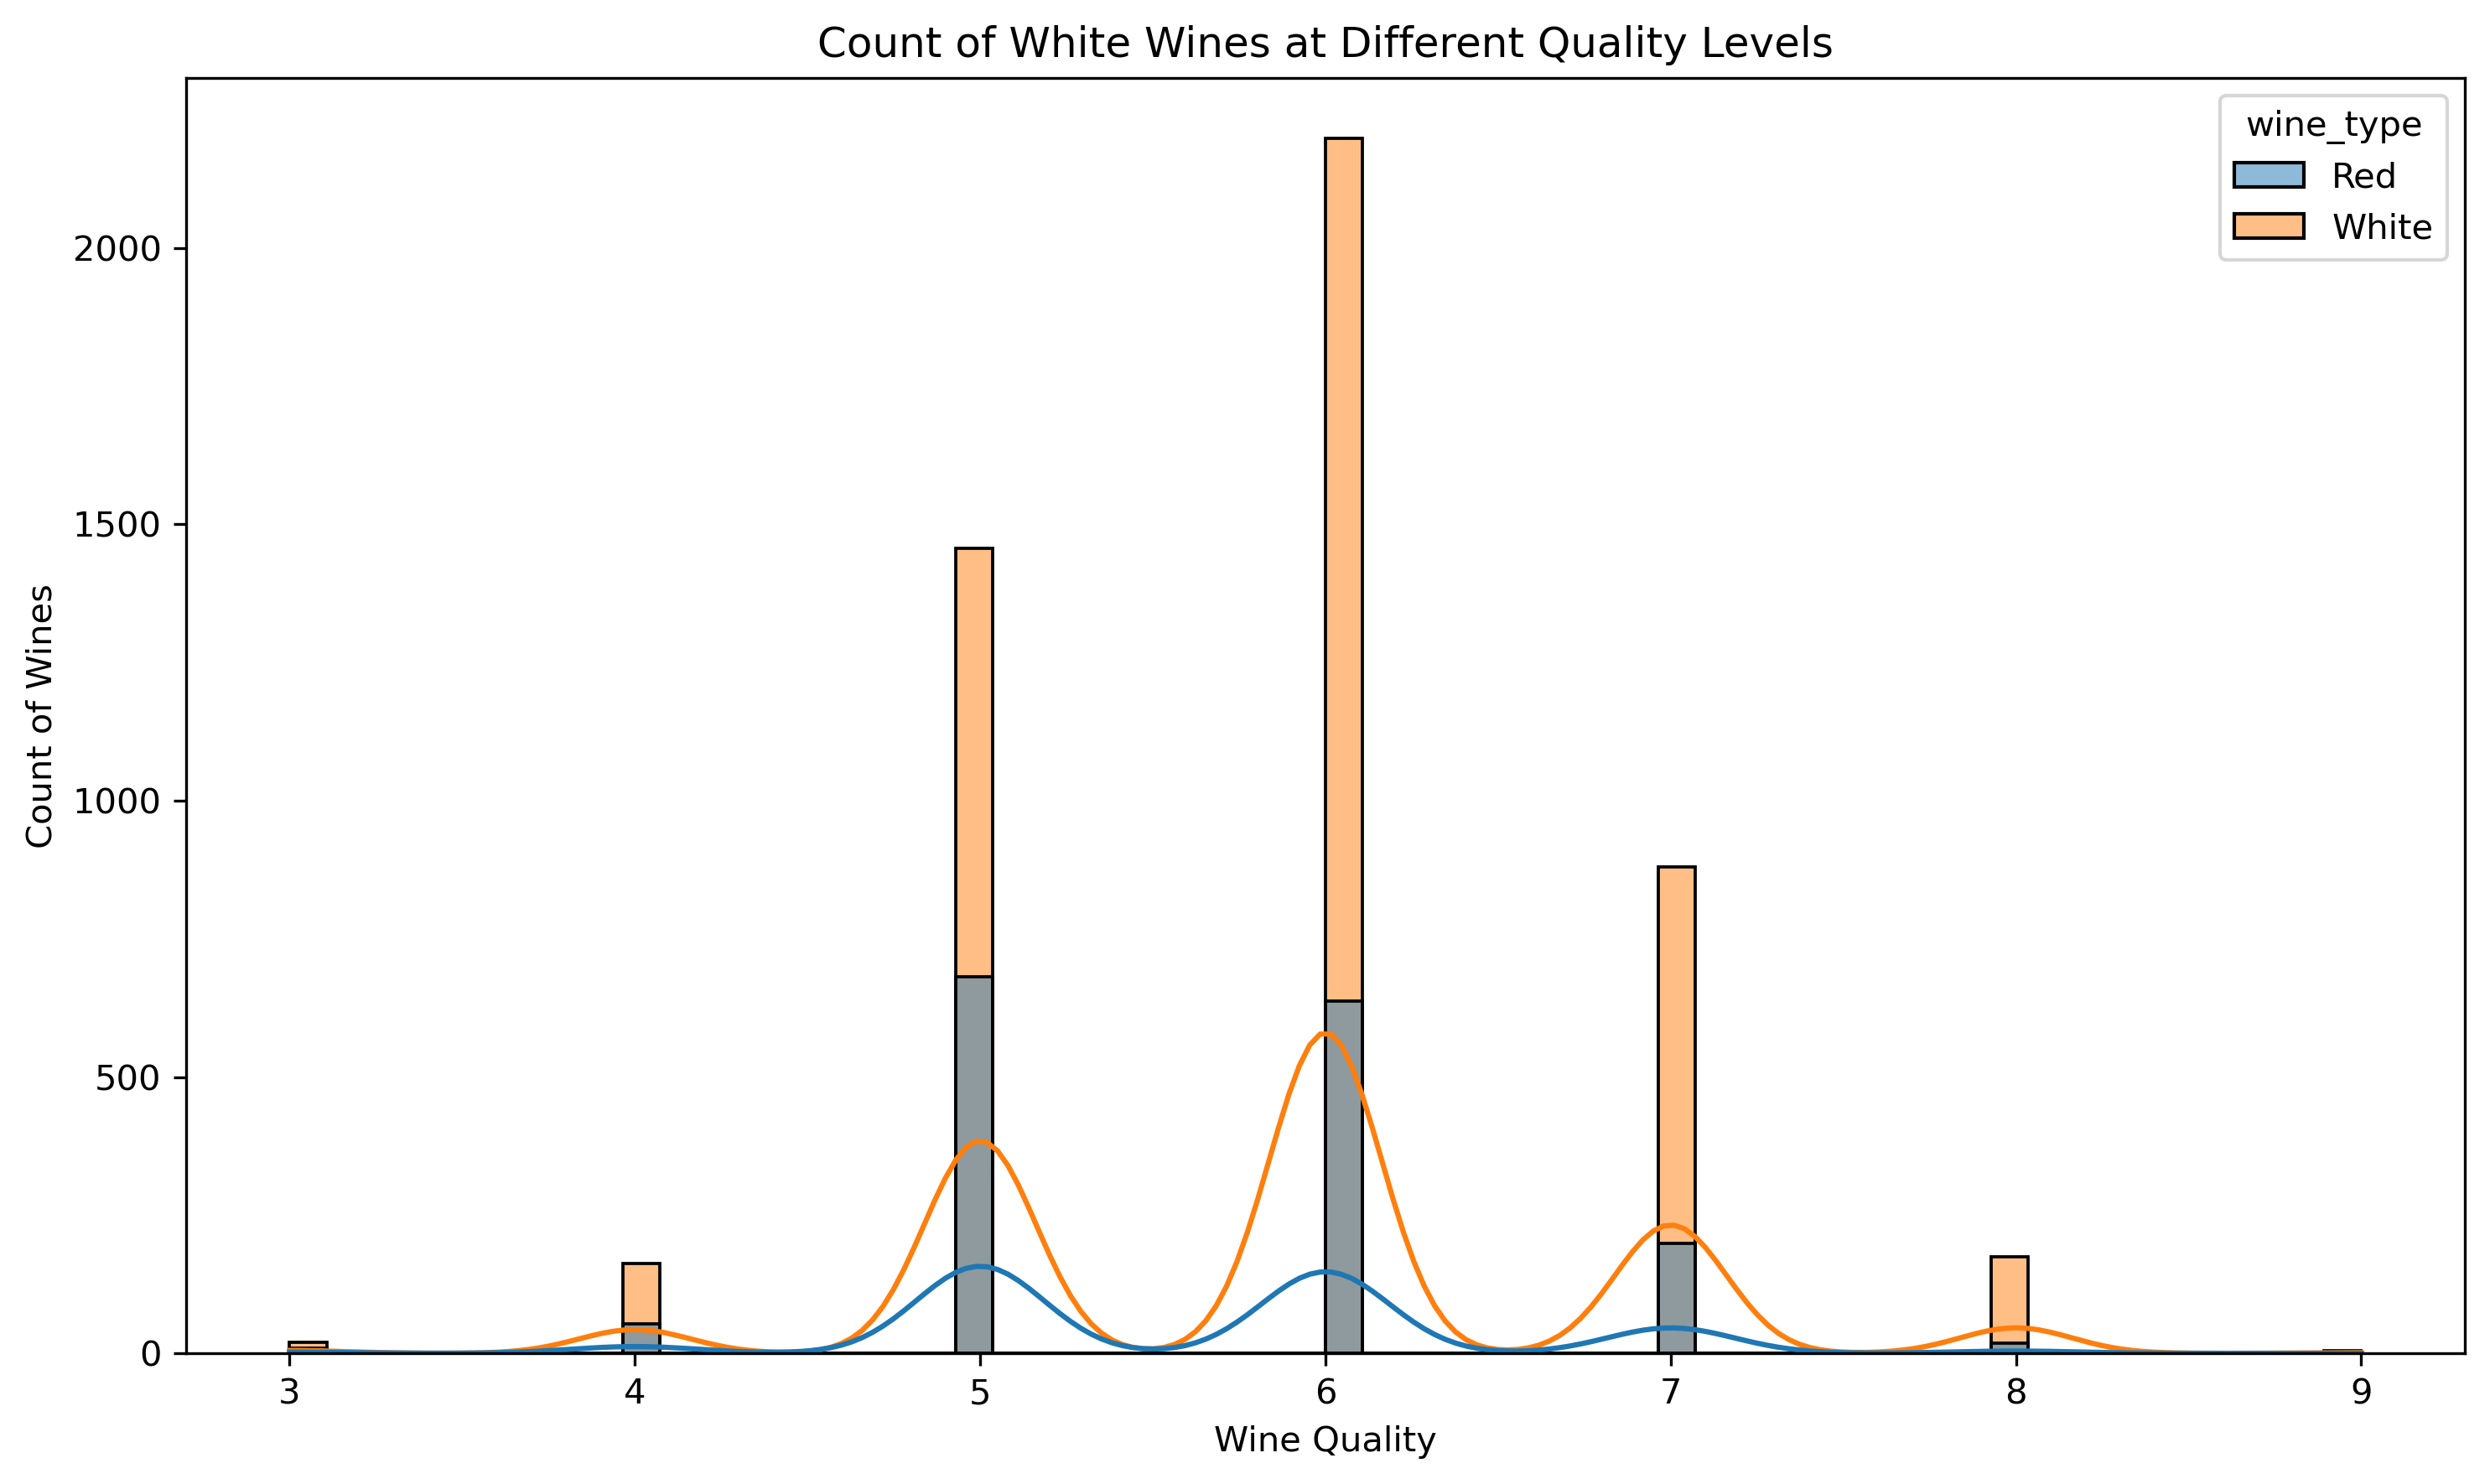

In [30]:
plt.figure(figsize=(10, 6), dpi=300)
white_wine_plot = white_wine.groupby('quality').size().reset_index(name='count')

sns.histplot(data=both_wines, x='quality', color='purple', kde=True, hue='wine_type')

plt.title("Count of White Wines at Different Quality Levels")
plt.xlabel("Wine Quality")
plt.ylabel("Count of Wines")

plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/1485567028.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data= both_wines, color='orange', y='total sulfur dioxide', hue='wine_type')


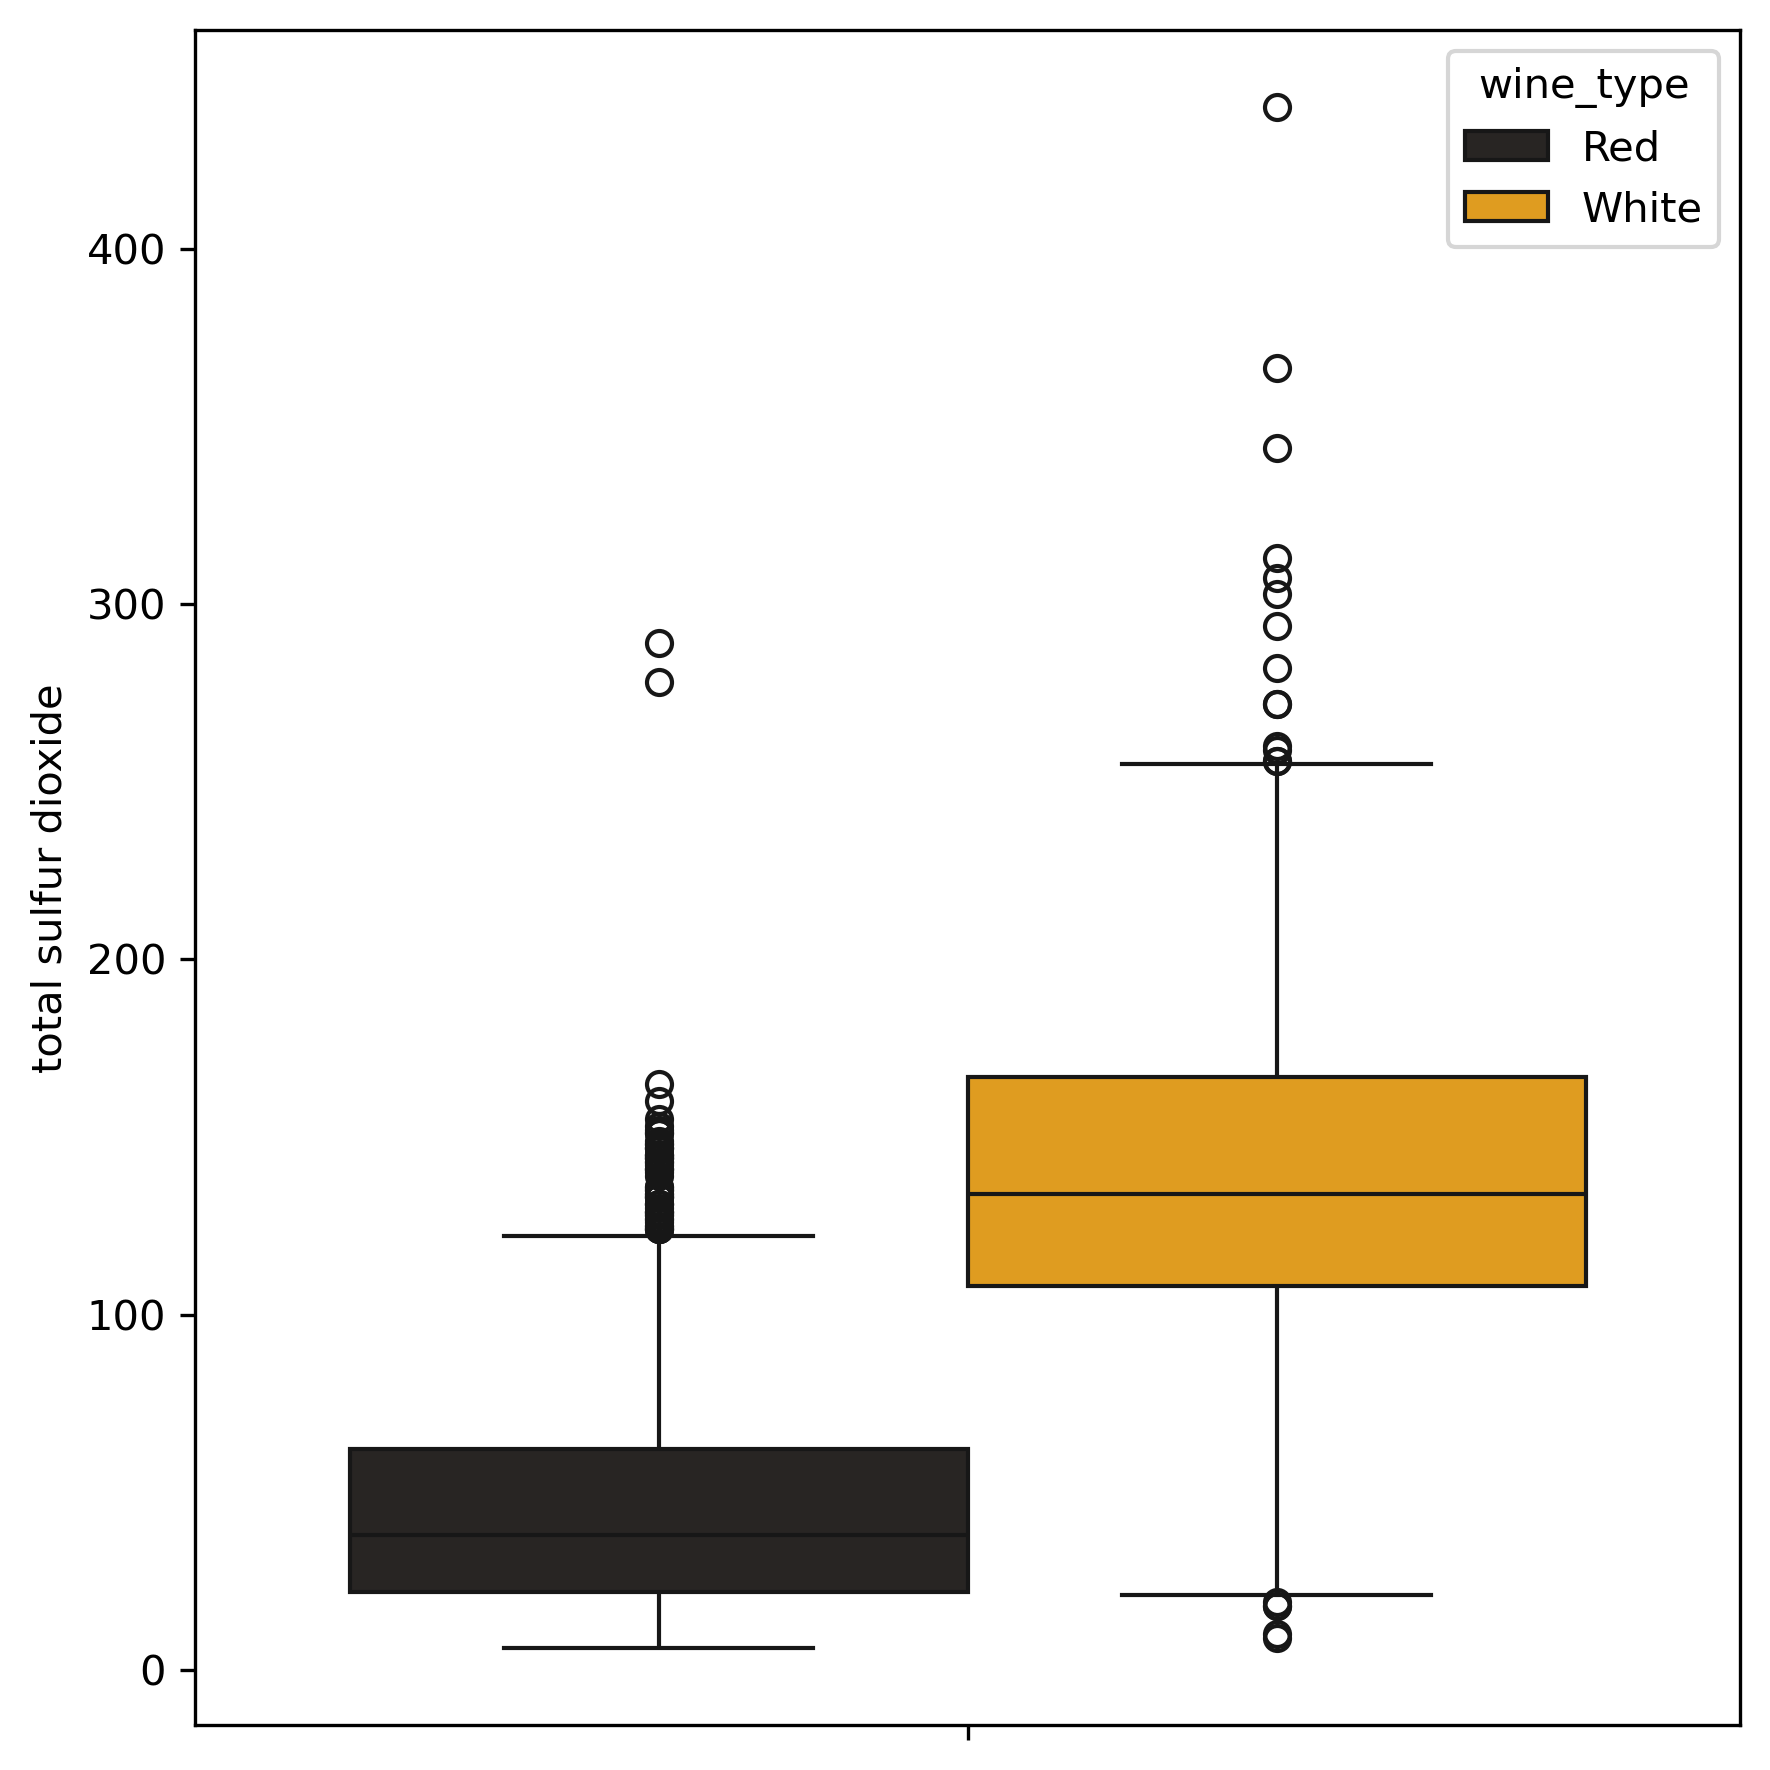

In [31]:
plt.figure(figsize=(6,6), dpi=300)
sns.boxplot(data= both_wines, color='orange', y='total sulfur dioxide', hue='wine_type')
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/833642522.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data= both_wines, color='orange', y='pH', hue='wine_type')


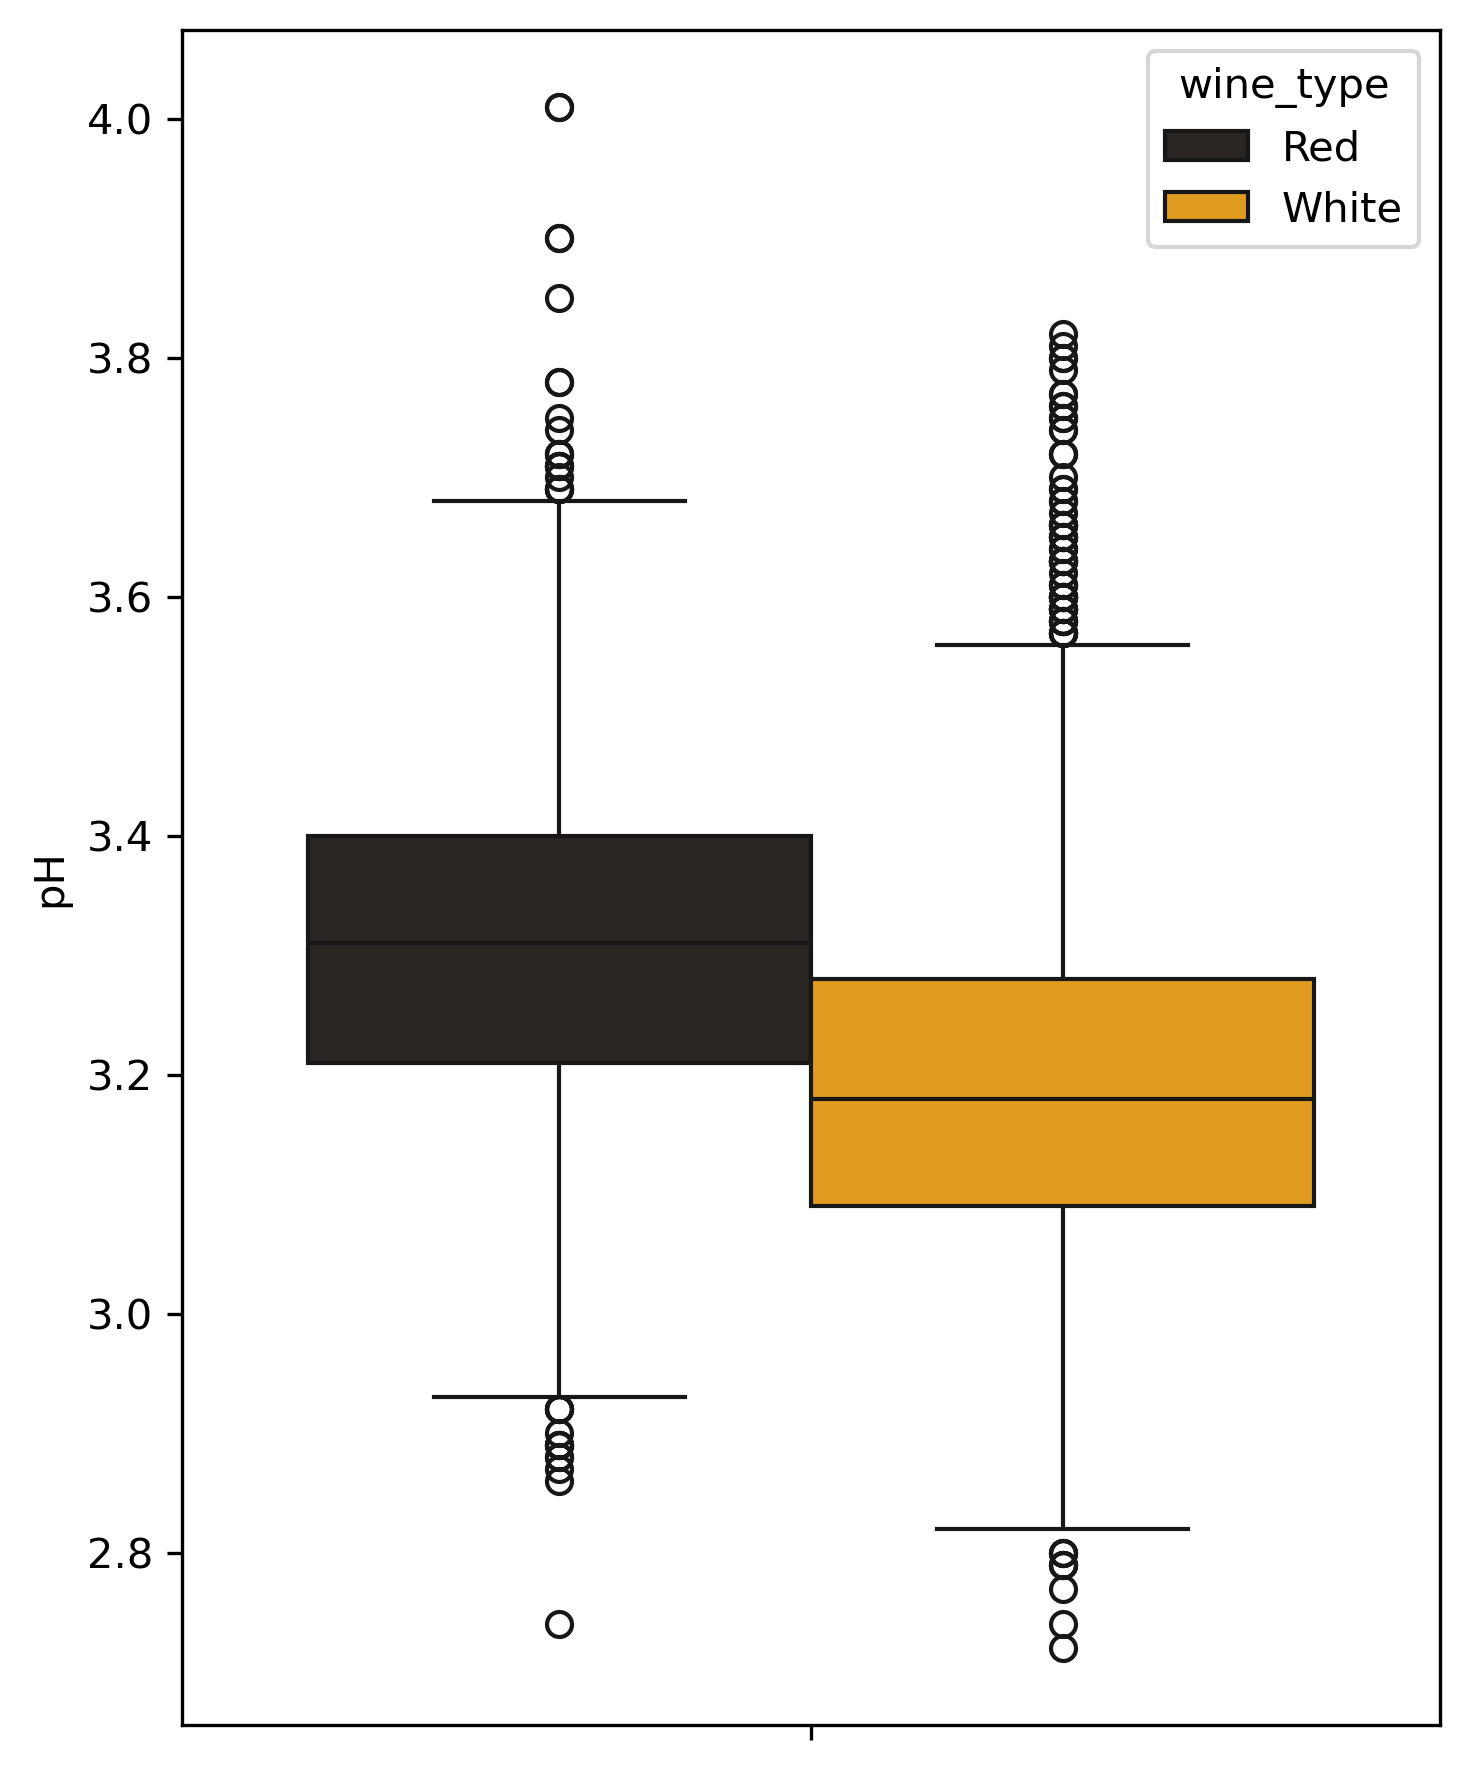

In [32]:
plt.figure(figsize=(5,6), dpi=300)
sns.boxplot(data= both_wines, color='orange', y='pH', hue='wine_type')
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/1543934619.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data= both_wines, color='orange', y='fixed acidity', hue='wine_type')


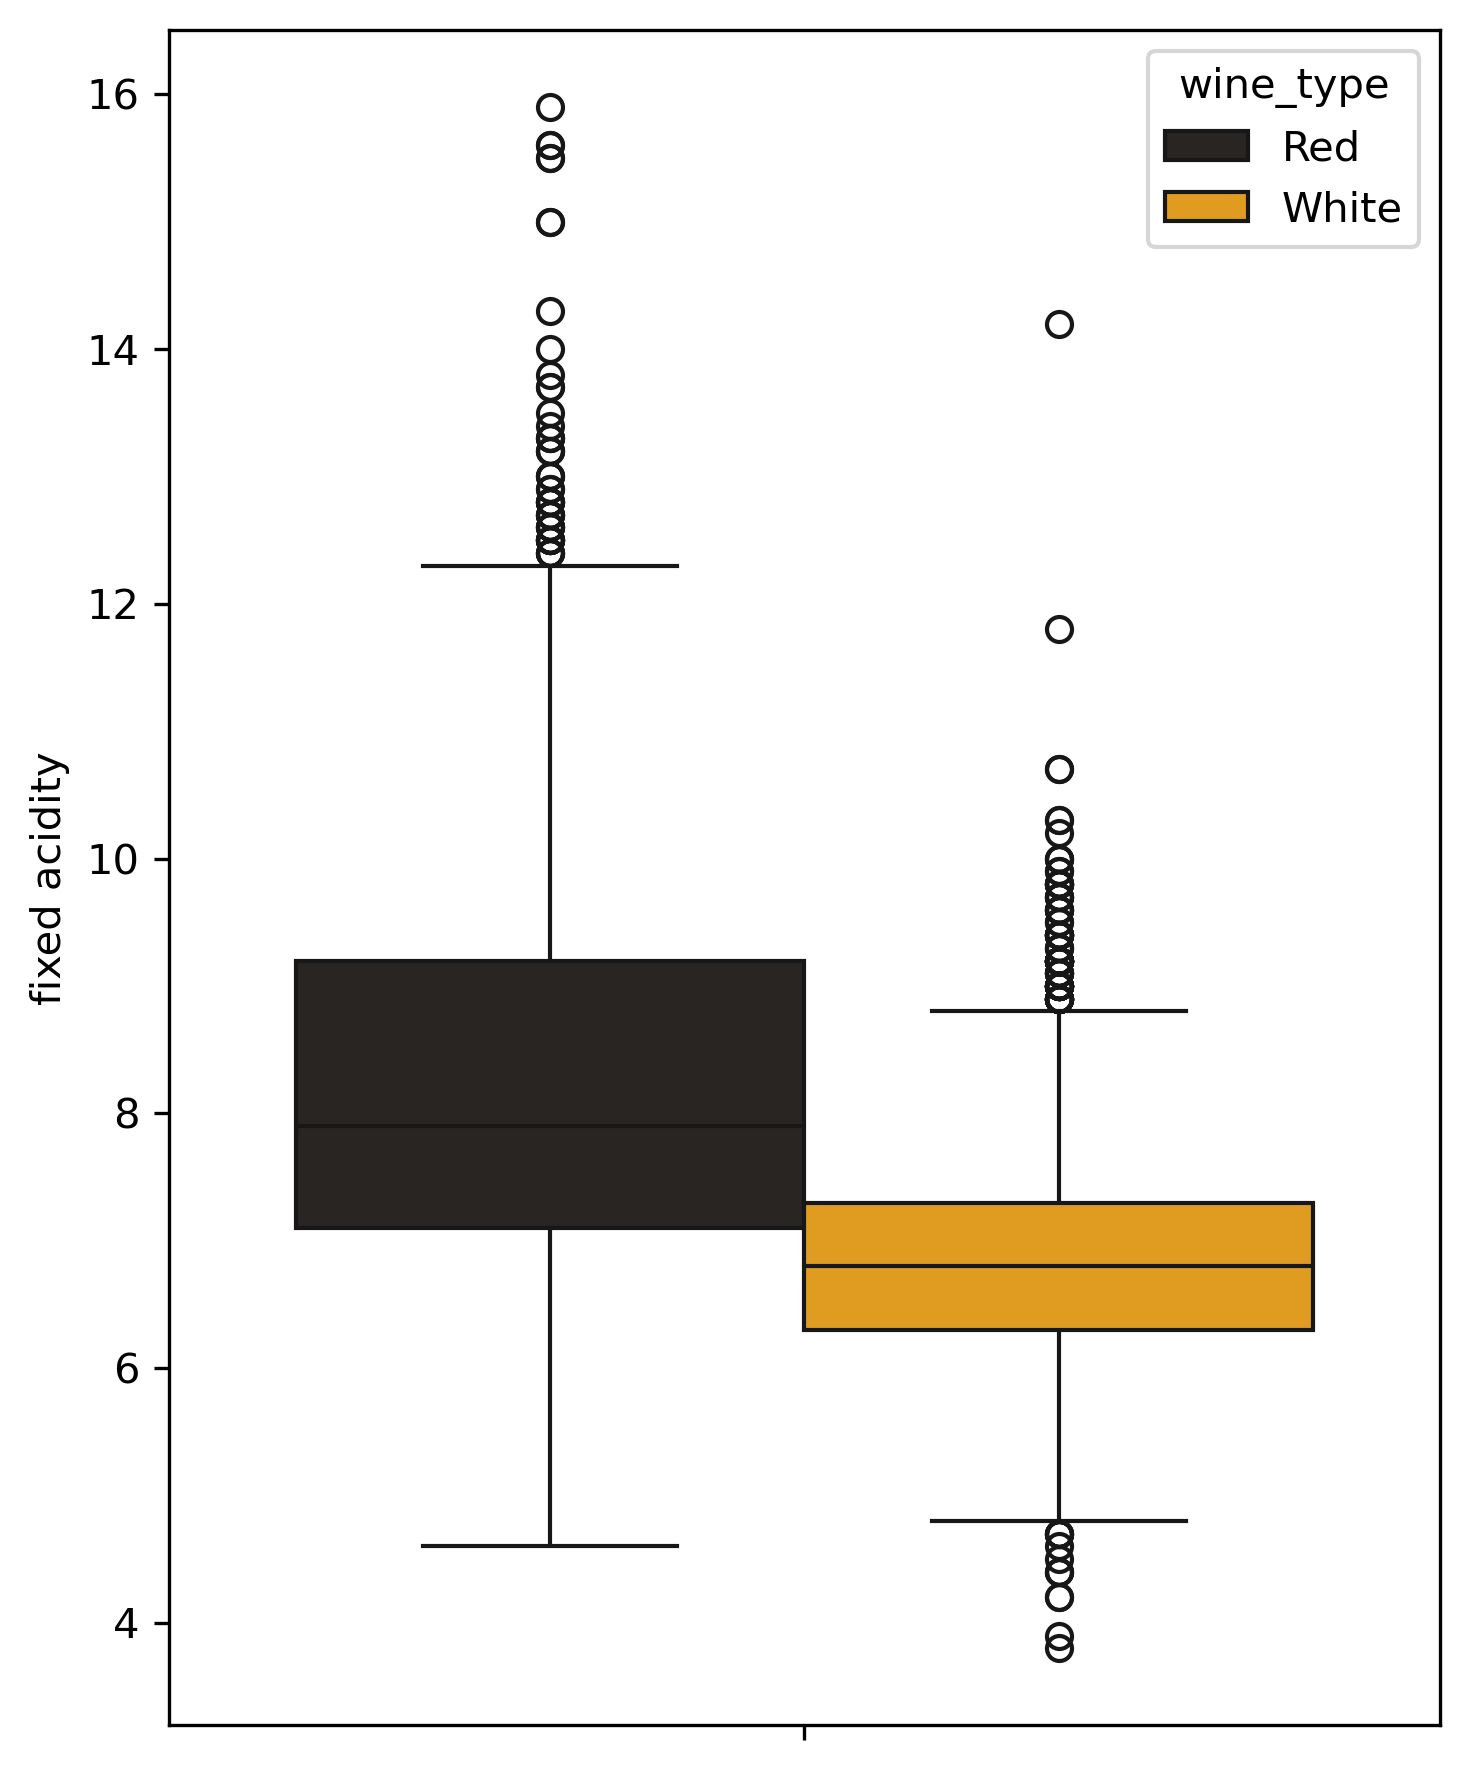

In [33]:
plt.figure(figsize=(5,6), dpi=300)
sns.boxplot(data= both_wines, color='orange', y='fixed acidity', hue='wine_type')
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/1872740049.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data= both_wines, color='orange', y='volatile acidity', hue='wine_type')


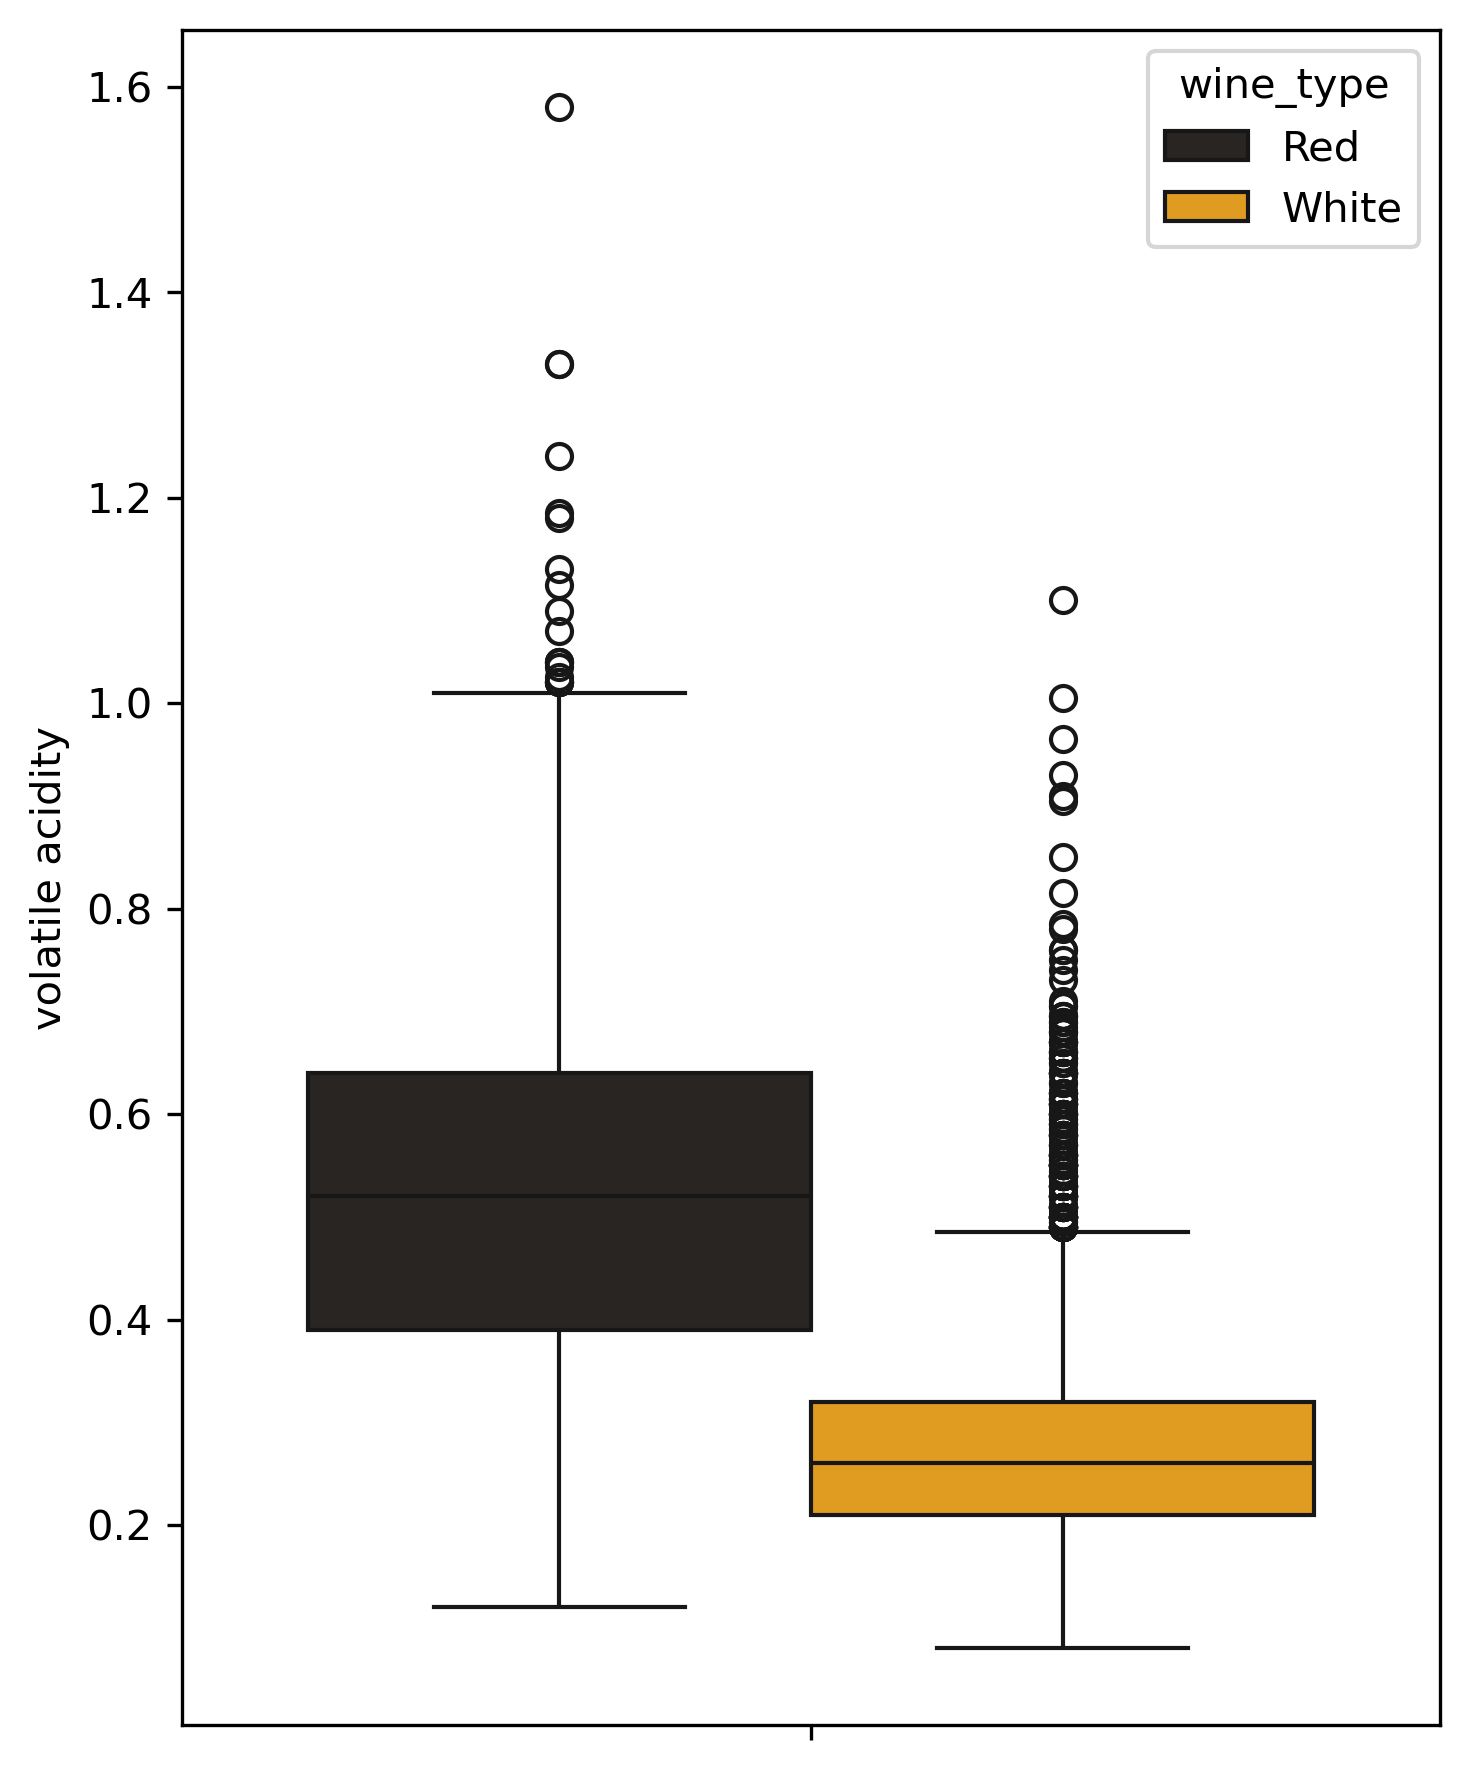

In [34]:
plt.figure(figsize=(5,6), dpi=300)
sns.boxplot(data= both_wines, color='orange', y='volatile acidity', hue='wine_type')
plt.tight_layout()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8897/2848009807.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data= both_wines, color='orange', y='free sulfur dioxide', hue='wine_type')


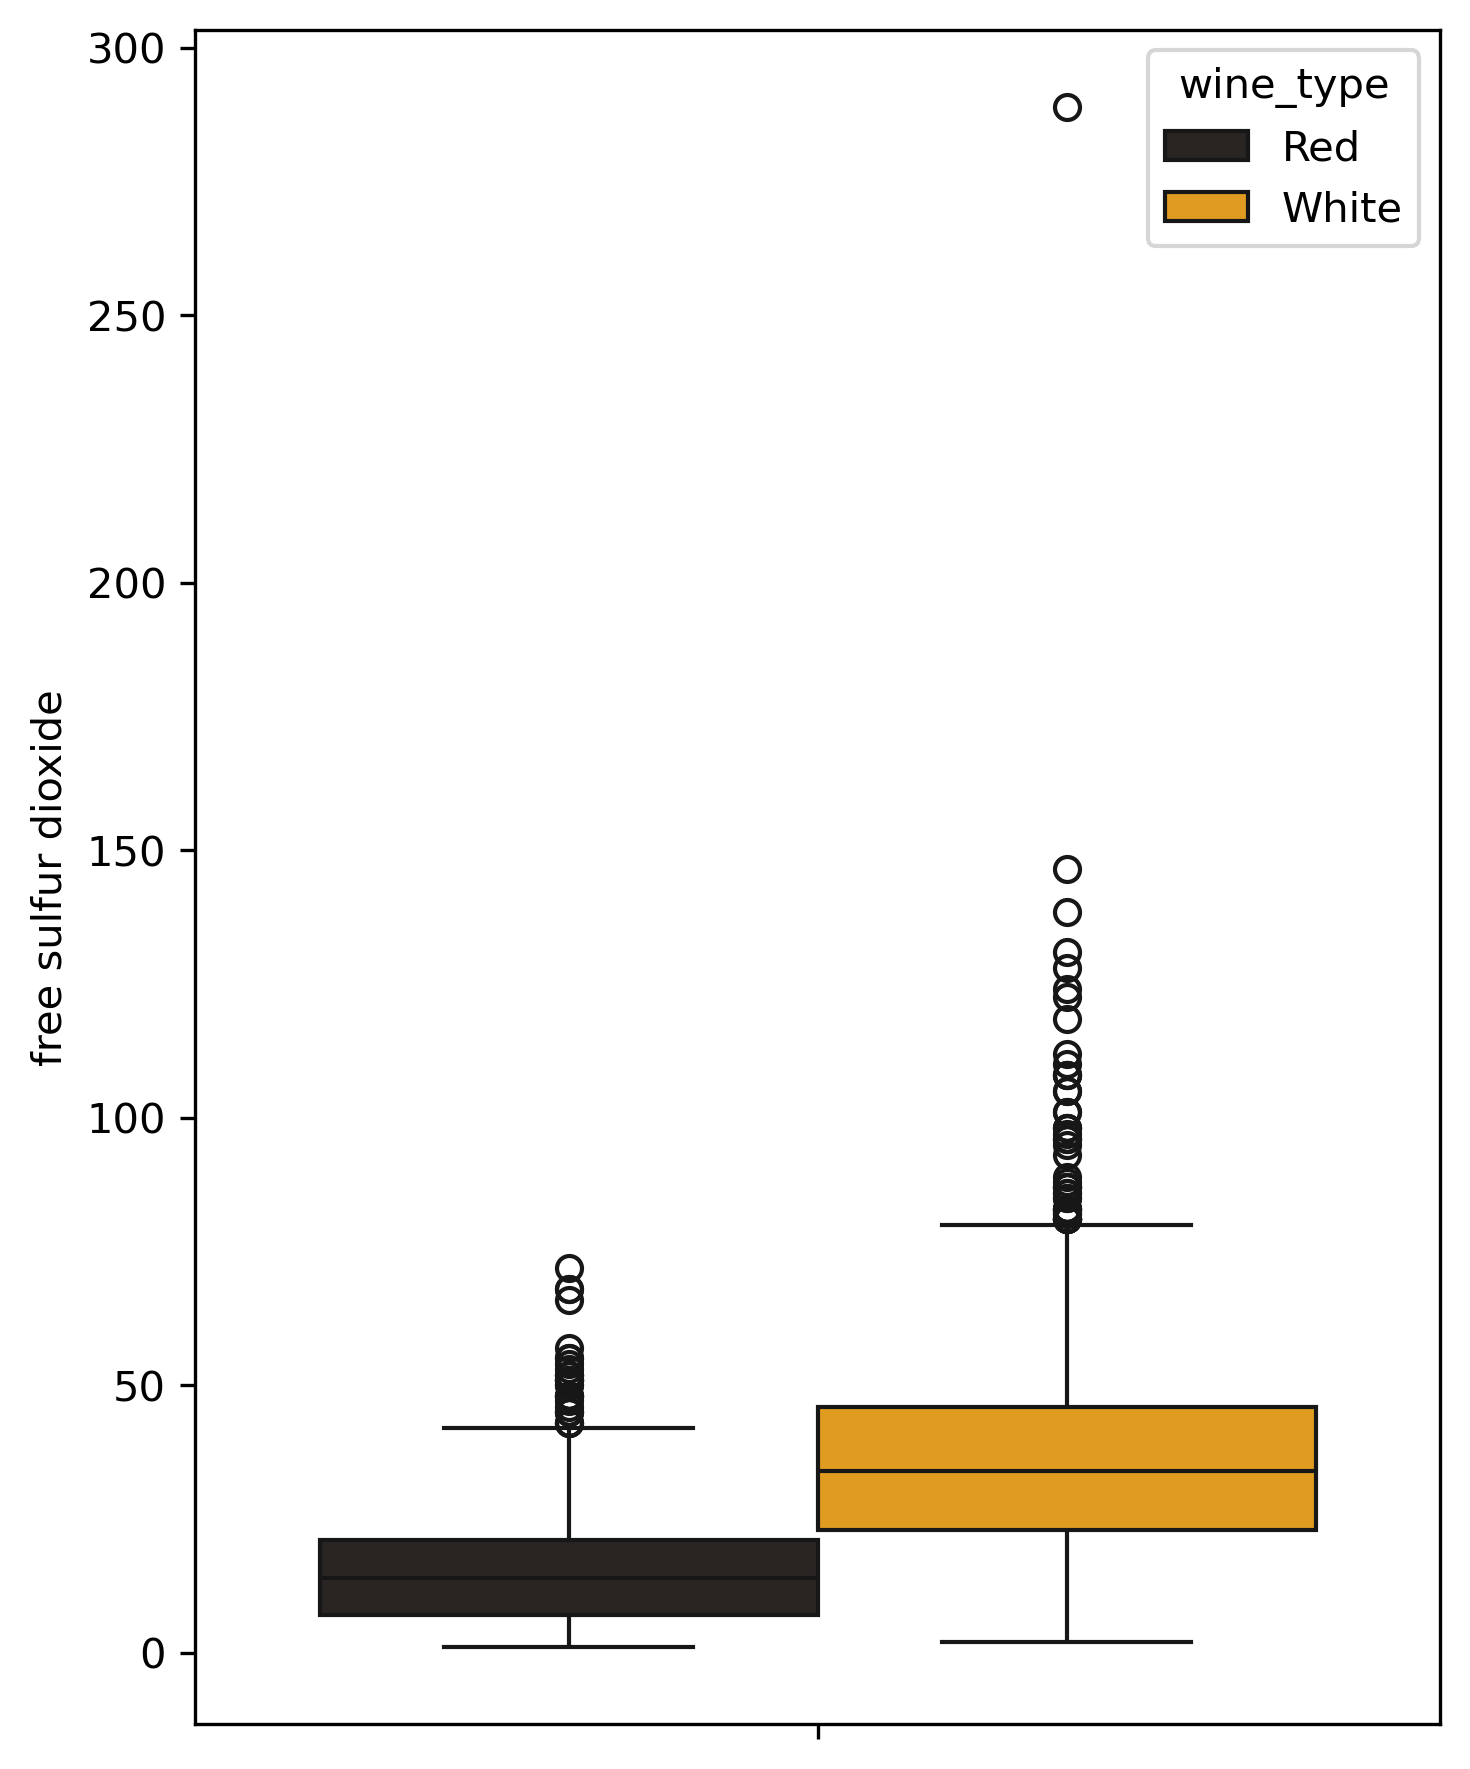

In [35]:
plt.figure(figsize=(5,6), dpi=300)
sns.boxplot(data= both_wines, color='orange', y='free sulfur dioxide', hue='wine_type')
plt.tight_layout()

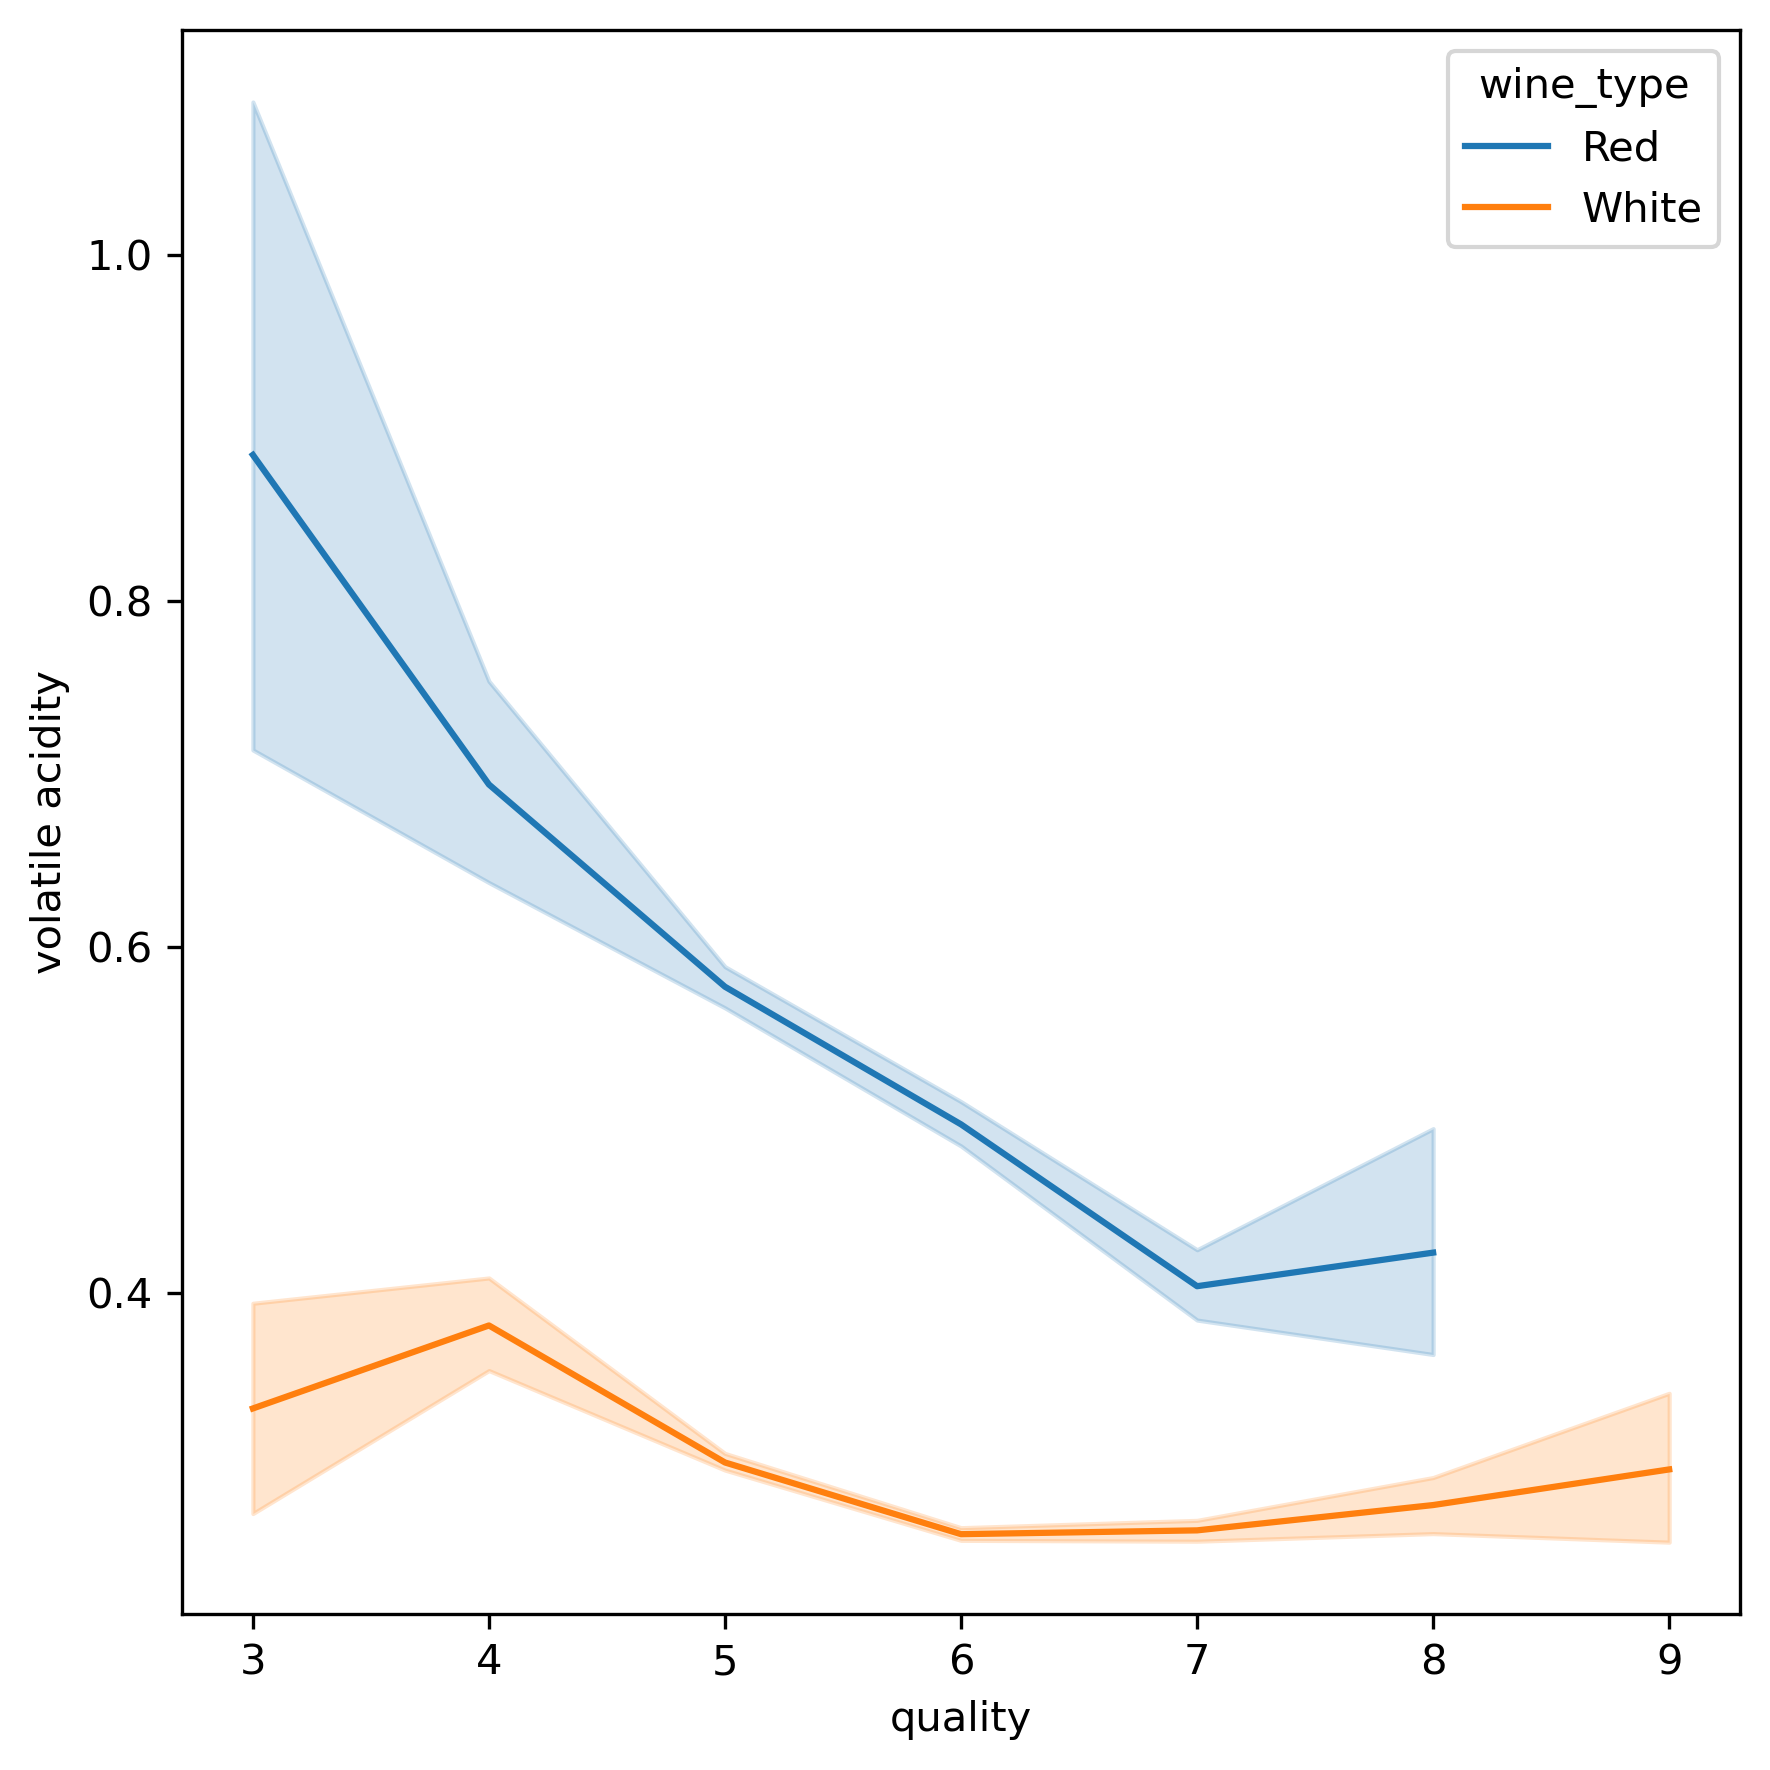

In [36]:
plt.figure(figsize=(6,6), dpi=300)
sns.lineplot(data = both_wines, color='blue', y='volatile acidity', x='quality', hue='wine_type')
plt.tight_layout()

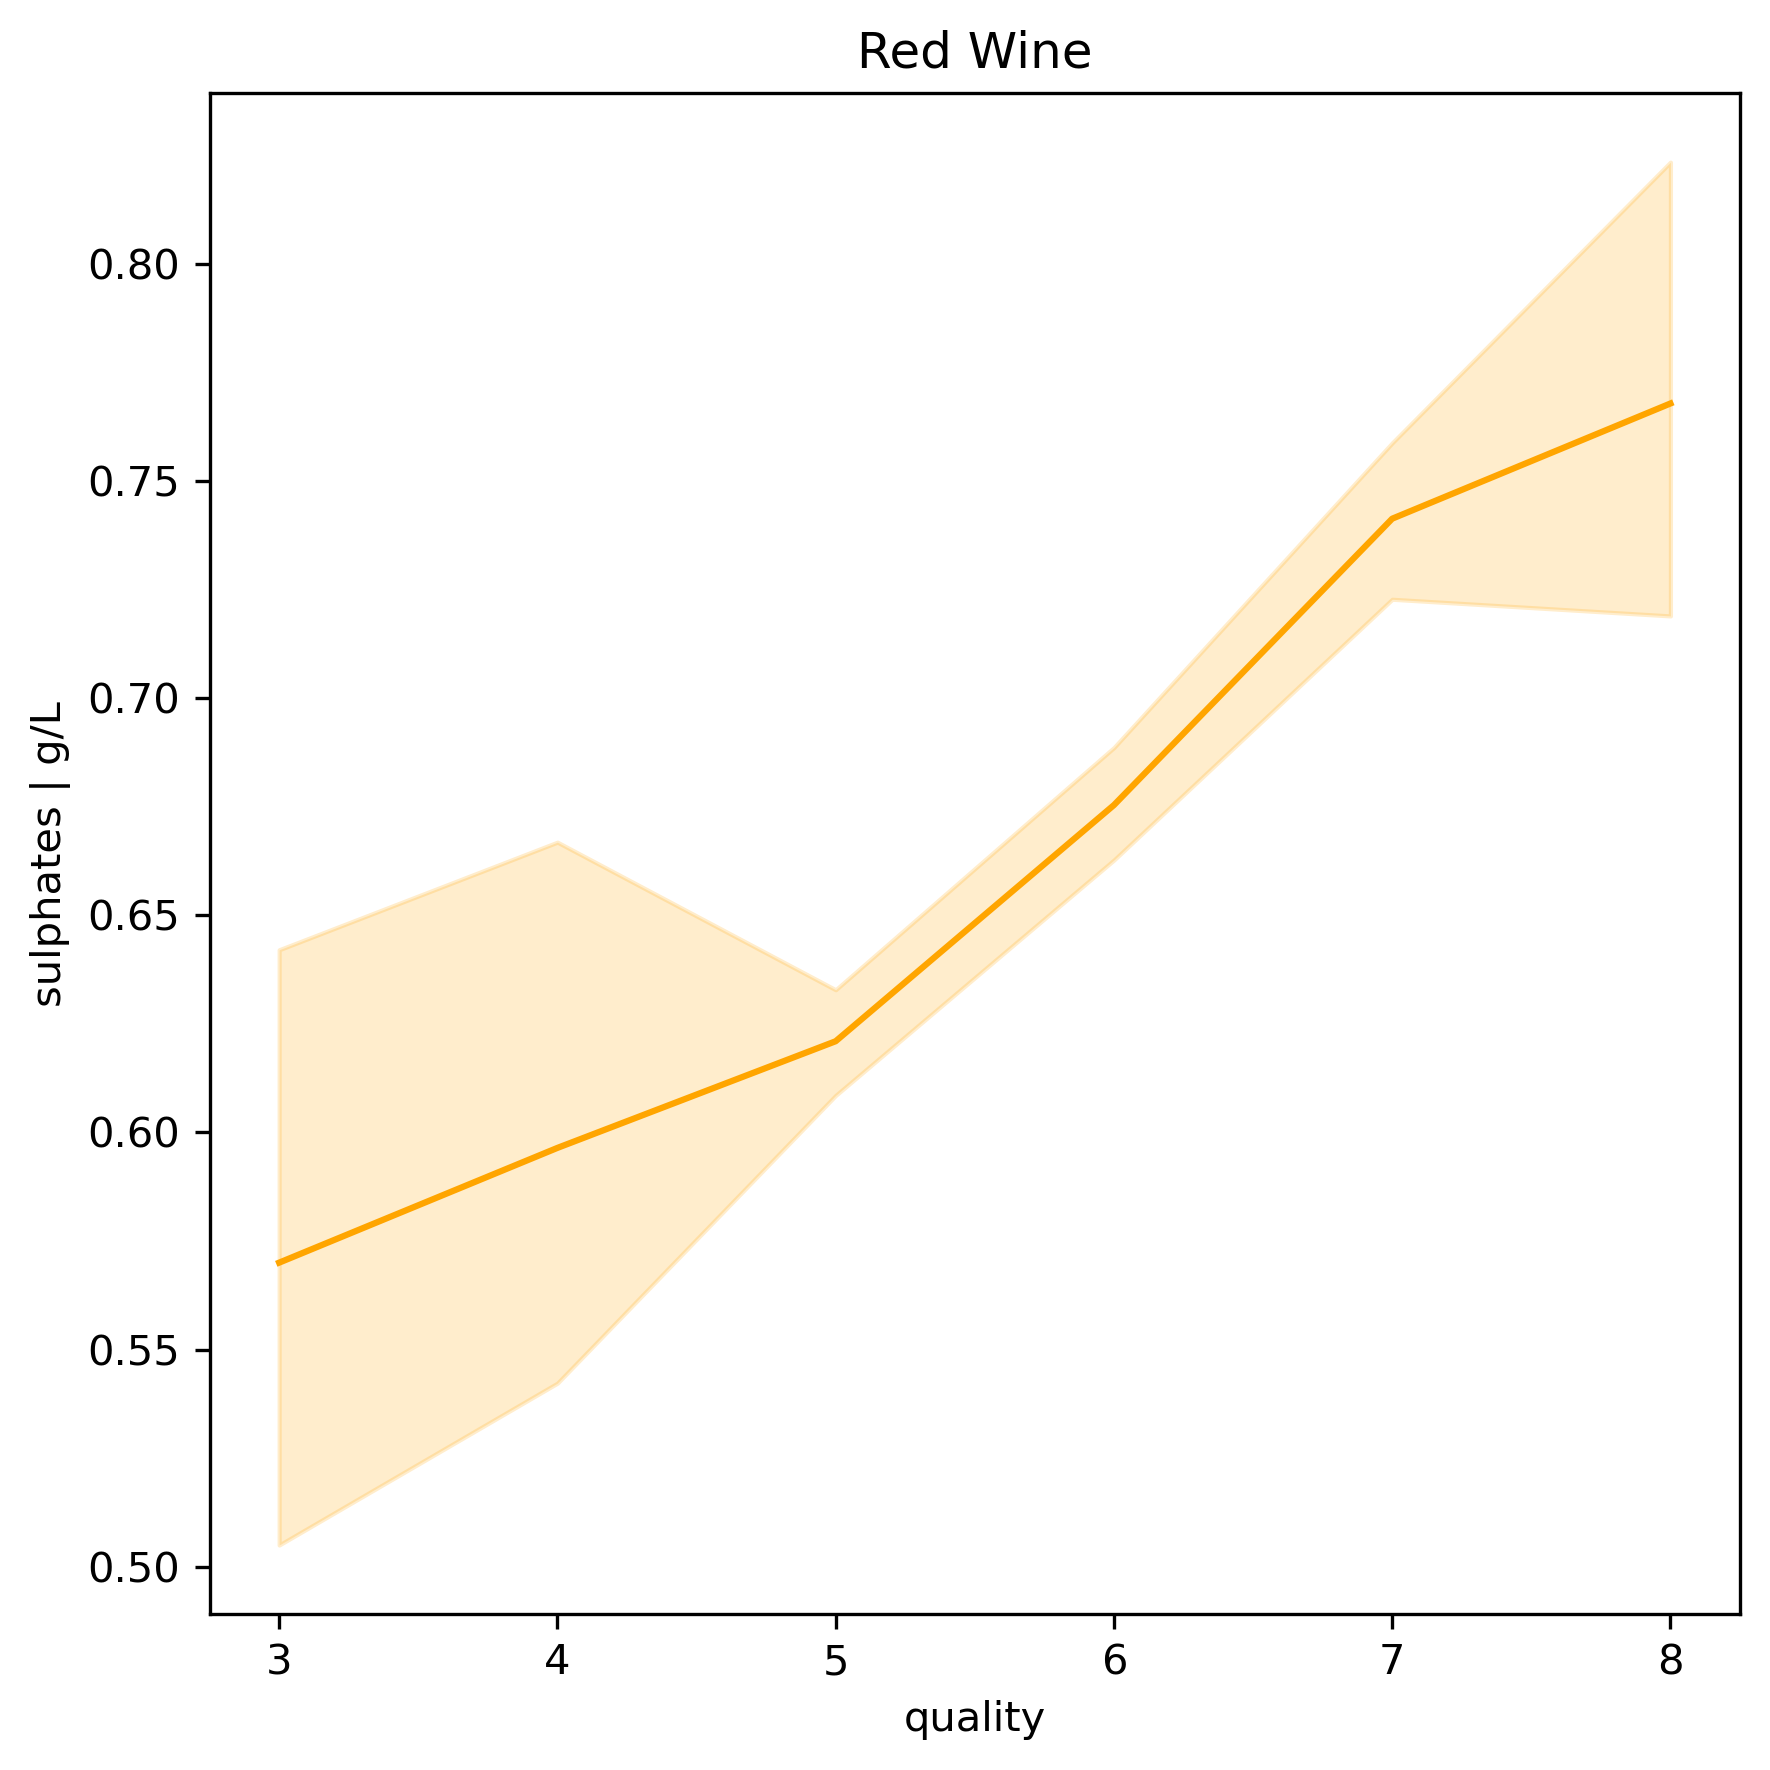

In [37]:
plt.figure(figsize=(6,6), dpi=300)
sns.lineplot(data = red_wine, color='orange', y='sulphates', x='quality')
plt.ylabel("sulphates | g/L")
plt.title("Red Wine")
plt.tight_layout()

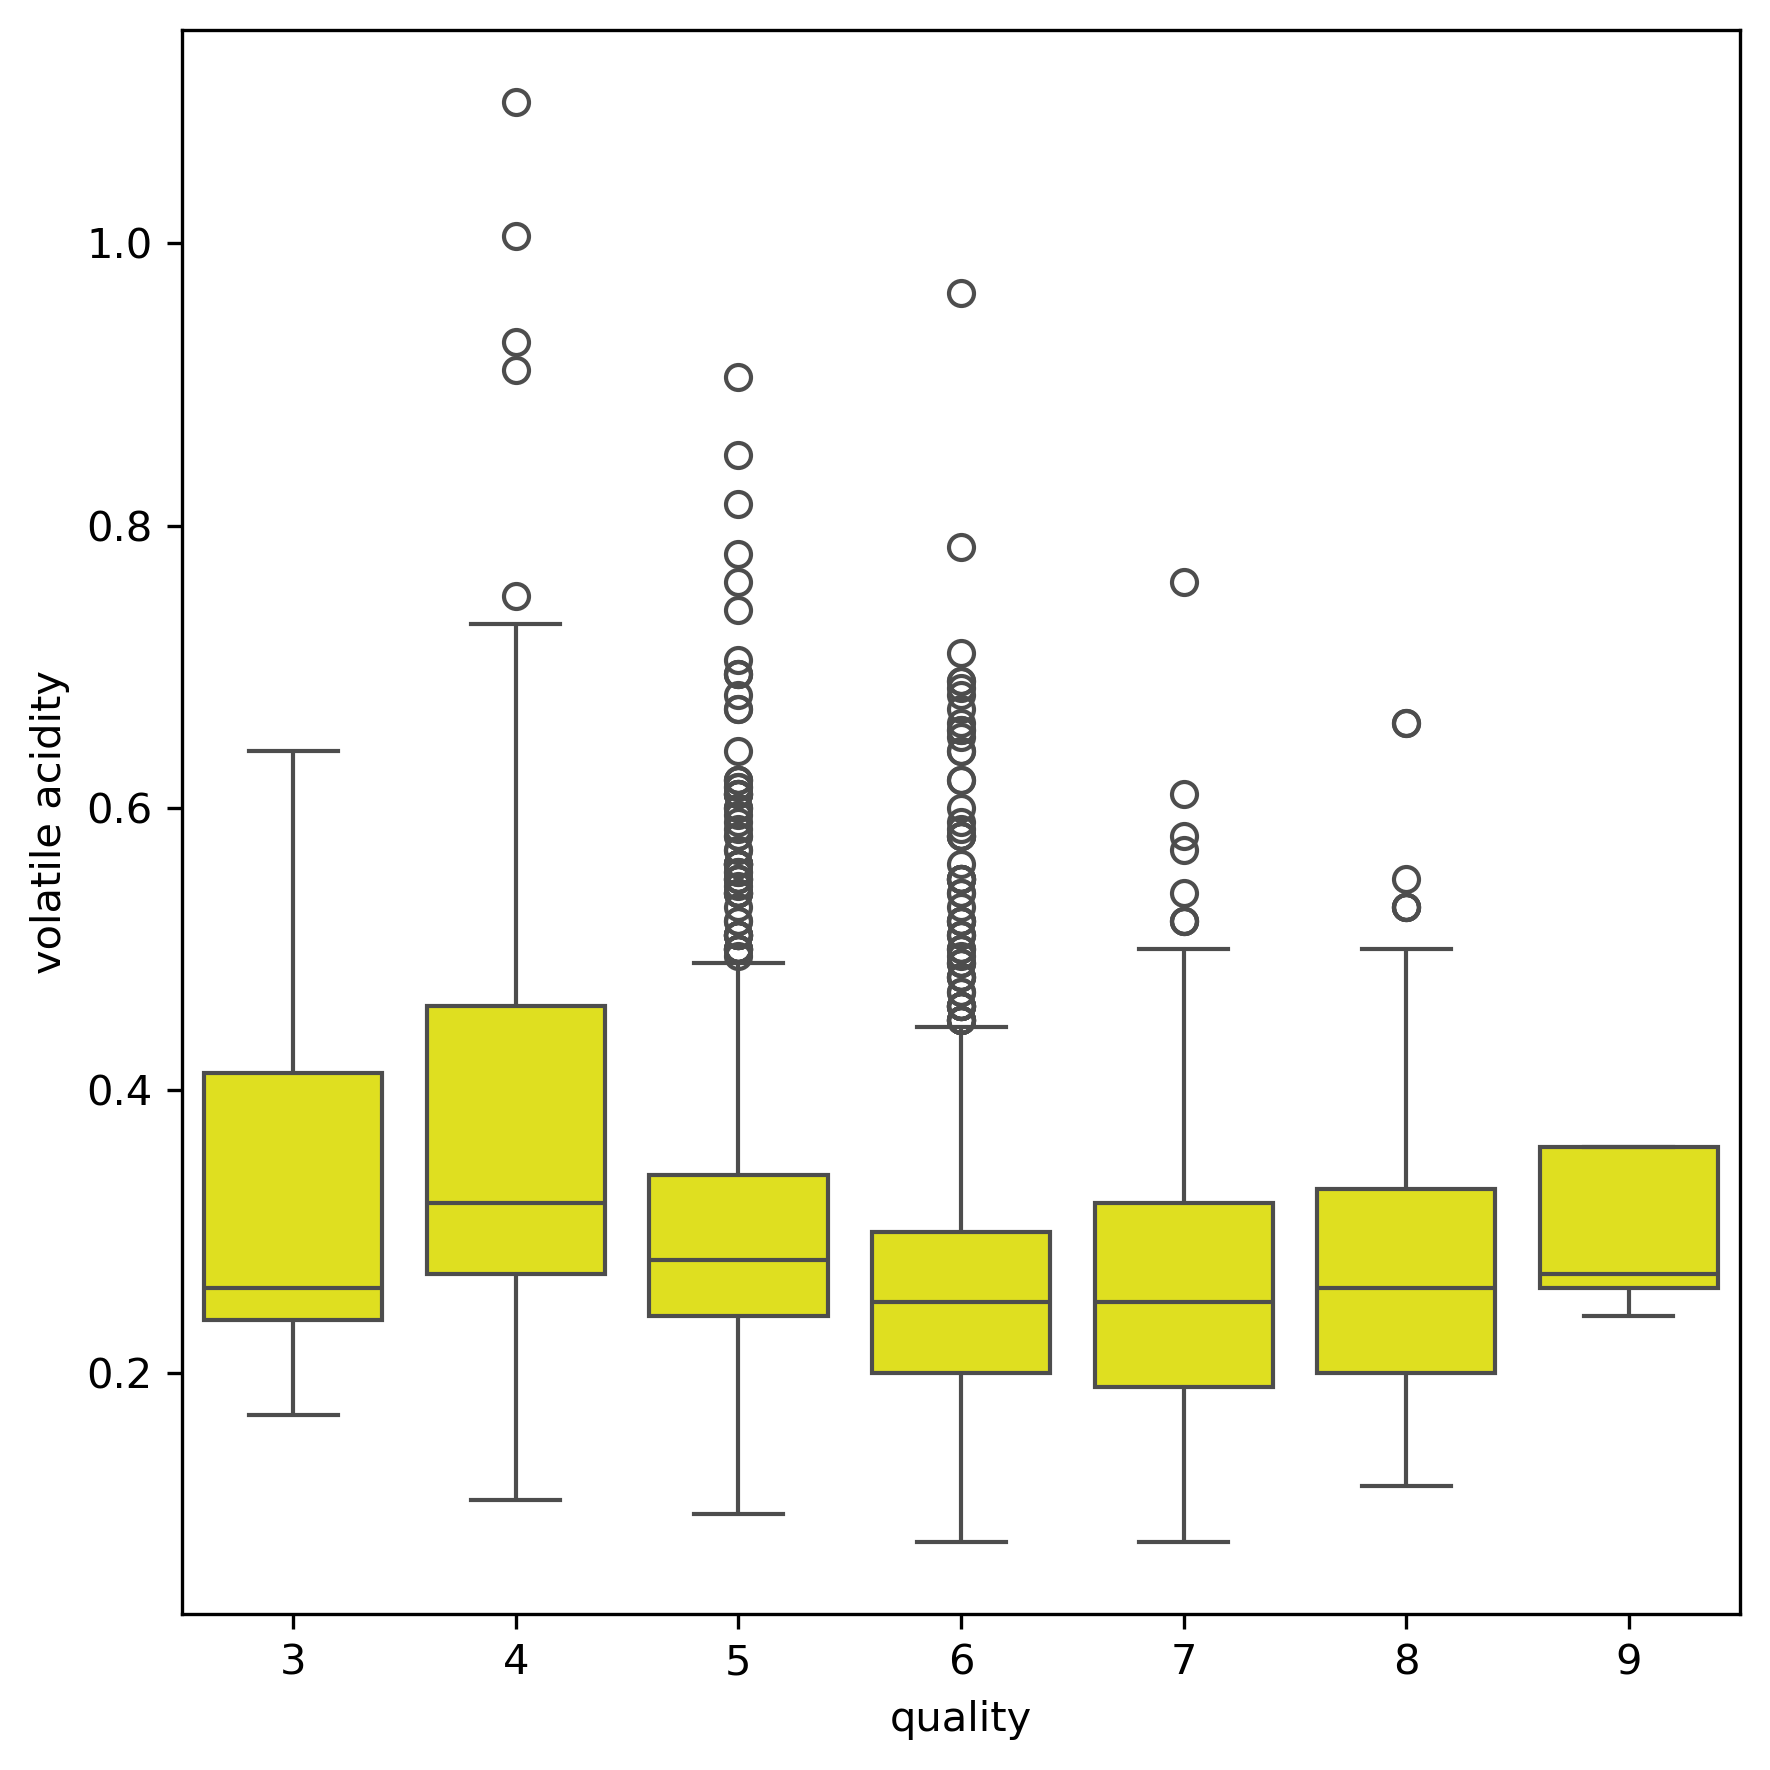

In [38]:
plt.figure(figsize=(6,6), dpi=300)
sns.boxplot(data = white_wine, color='yellow', y='volatile acidity', x='quality')
plt.tight_layout()

In [39]:
highest_red = red_wine.loc[red_wine['quality']].idxmax()
lowest_red = red_wine.loc[red_wine['quality']].idxmin()

comparison_df = pd.DataFrame({
    'Characteristic': highest_red.index, 
    'Highest Quality': highest_red.values,
    'Lowest Quality': lowest_red.values
}).set_index('Characteristic')

comparison_melted = comparison_df.reset_index().melt(id_vars='Characteristic', 
                                                     var_name='Quality', 
                                                     value_name='Value')

comparison_melted_null = comparison_melted.drop(columns=['wine_type', 'quality_label'])

KeyError: "['wine_type', 'quality_label'] not found in axis"

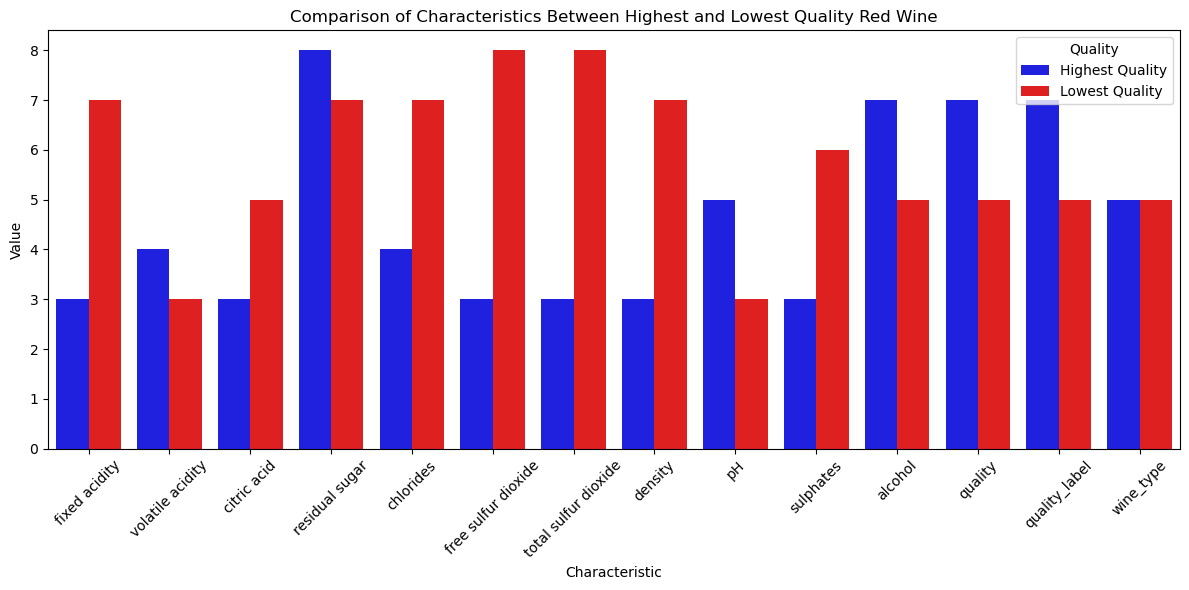

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted_null, x='Characteristic', y='Value', hue='Quality', palette={'Highest Quality': 'blue', 'Lowest Quality': 'red'})
plt.xticks(rotation=45)
plt.title("Comparison of Characteristics Between Highest and Lowest Quality Red Wine")
plt.tight_layout()
plt.show()

In [ ]:
highest_white = white_wine.loc[white_wine['quality']].idxmax()
lowest_white = white_wine.loc[white_wine['quality']].idxmin()

comparison_df = pd.DataFrame({
    'Characteristic': highest_white.index, 
    'Highest Quality': highest_white.values,
    'Lowest Quality': lowest_white.values
}).set_index('Characteristic')

comparison_melted_white = comparison_df.reset_index().melt(id_vars='Characteristic', 
                                                     var_name='Quality', 
                                                     value_name='Value')

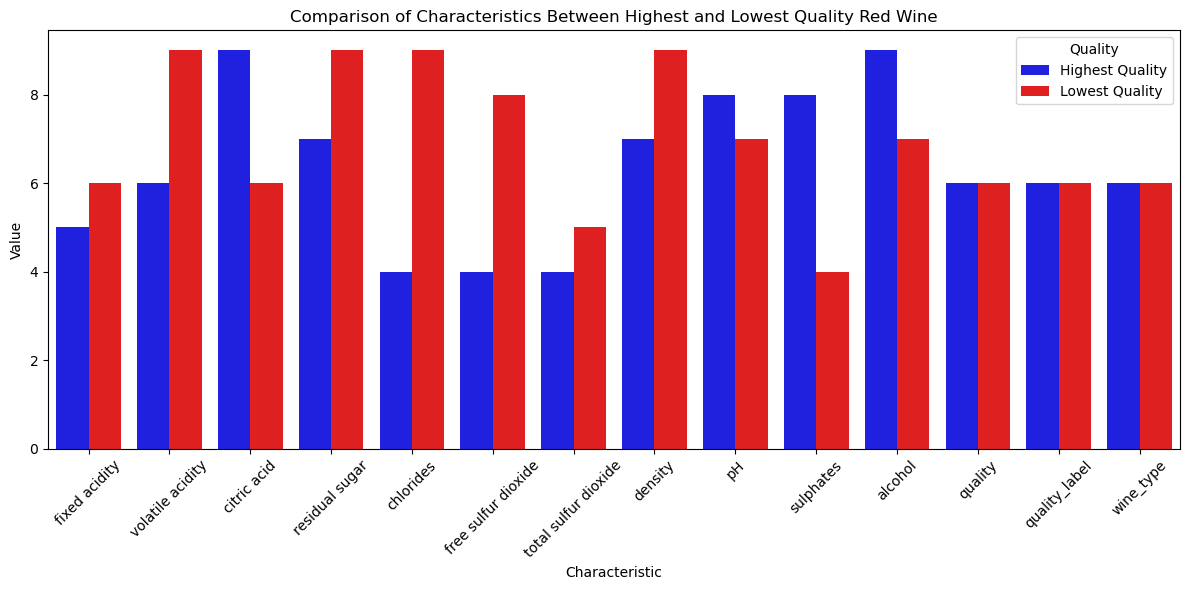

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted_white, x='Characteristic', y='Value', hue='Quality', palette={'Highest Quality': 'blue', 'Lowest Quality': 'red'})
plt.xticks(rotation=45)
plt.title("Comparison of Characteristics Between Highest and Lowest Quality Red Wine")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'total sulfur dioxide | mg/L')

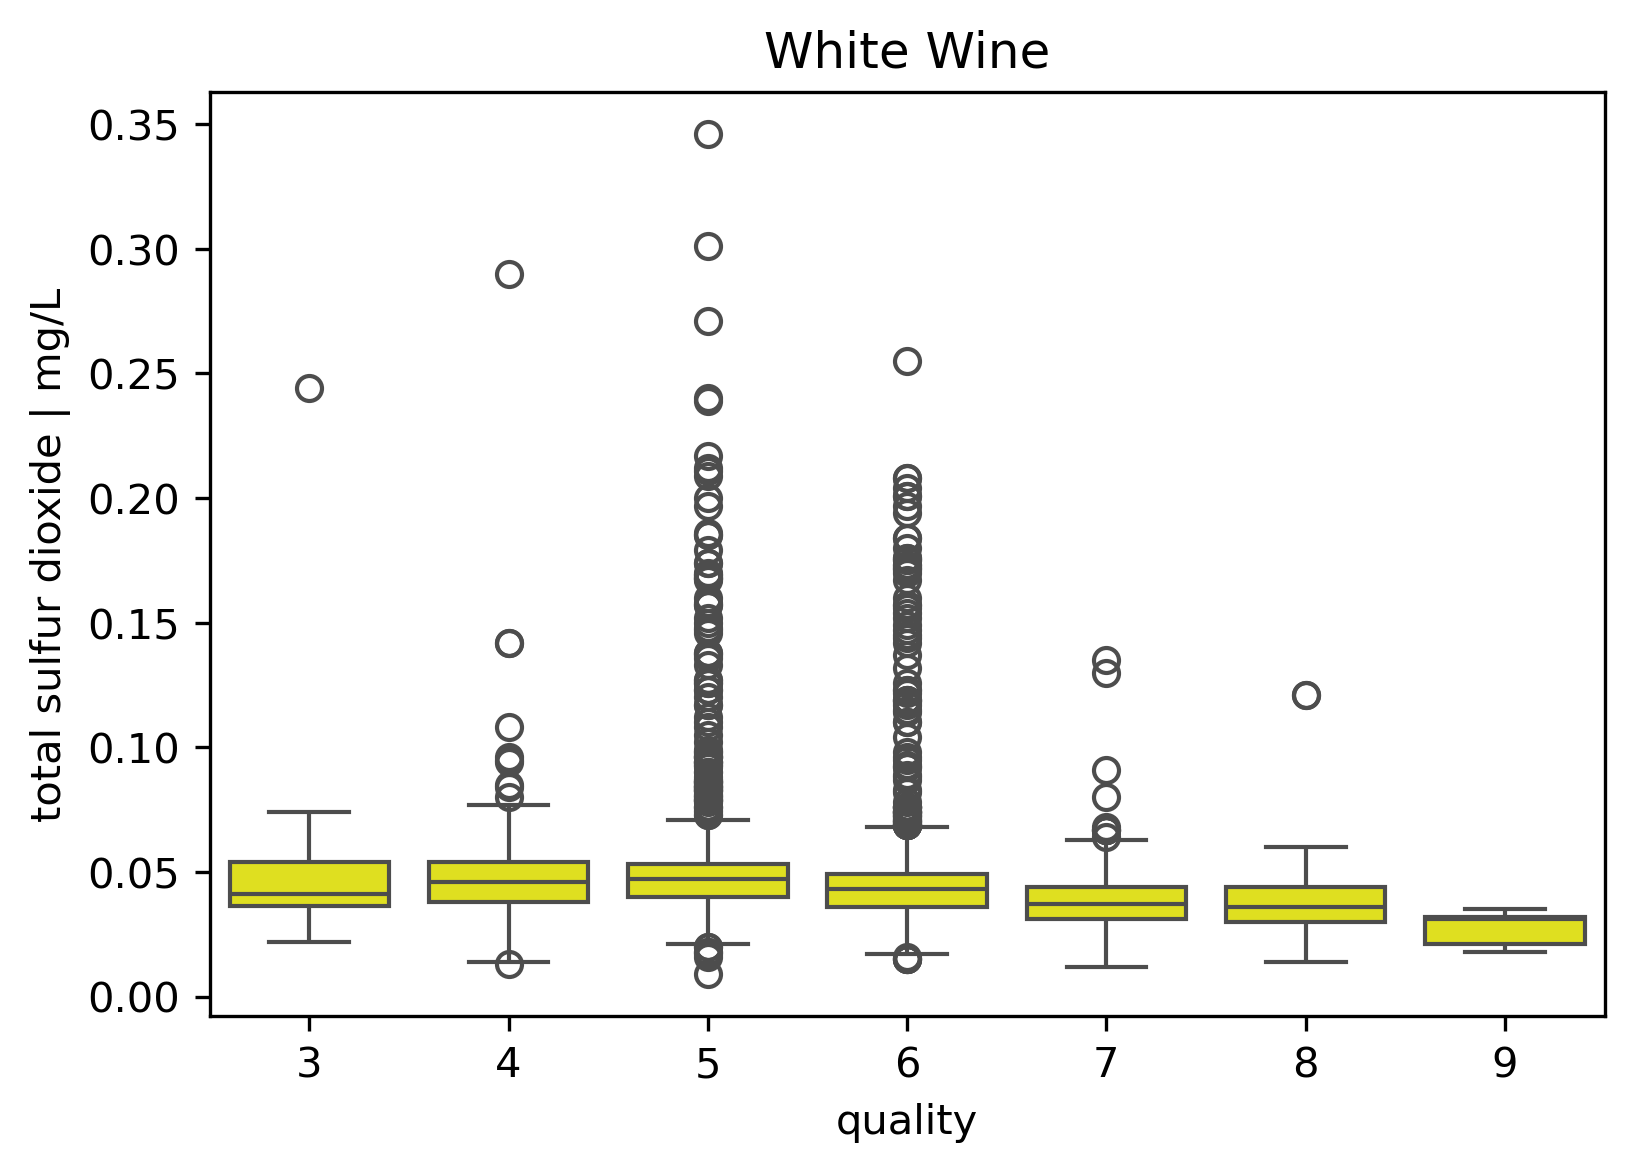

In [ ]:
plt.figure(figsize=(6,4), dpi=300)
sns.boxplot(data=white_wine, color='yellow', y='chlorides', x='quality')
plt.title("White Wine")
plt.ylabel("total sulfur dioxide | mg/L")